In [1]:
import numpy as np
import sys
sys.path.append('Module')
import matplotlib.pyplot as plt
from numpy.linalg import inv
from numpy.linalg import pinv
import matplotlib.cm as cm
%matplotlib inline
import os
%load_ext autoreload

In [2]:
from PINT import tuning_curves

In [3]:
meas_path = 'several0\\meas\\'
spec_path = 'several0\\specs\\'
cals_path = 'several0\\cals\\'


Tarr = np.load(spec_path + 'Tarr.npy')
pool_ids = np.load(spec_path + 'pool_ids.npy')
N_pools = len(pool_ids)
N_neurs = np.load(spec_path + 'N_neurs.npy')
iin = np.load(spec_path + 'x_in.npy')

In [4]:
def get_curve(p):
    try:
        A = np.load(meas_path + 'A_' + pool_ids[p] + '.npy')
        return A
    except:
        print('Tuning curve not found')
        
def get_TPM(p):
    try:
        TPM = np.load(cals_path + 'TPM_' + pool_ids[p] + '.npy')
        return TPM
    except:
        print('TPM not found')

In [29]:
%autoreload

In [32]:
n = 1
order = 0
tc = tuning_curves(get_curve(n), Tarr, 0.1, iin, order = order)
f = np.power(iin, 1)
d = tc.decode_cvx(f)
print(d.shape)

creating child
     pcost       dcost       gap    pres   dres
 0: -1.6998e+01 -1.5707e+02  1e+02  5e-17  3e-16
 1: -1.6998e+01 -1.8398e+01  1e+00  2e-16  3e-16
 2: -1.6998e+01 -1.7012e+01  1e-02  2e-16  4e-16
 3: -1.6998e+01 -1.6998e+01  1e-04  2e-16  5e-16
 4: -1.6998e+01 -1.6998e+01  1e-06  2e-16  3e-16
Optimal solution found.
(70, 1)


TypeError: NumPy boolean array indexing assignment requires a 0 or 1-dimensional input, input has 2 dimensions

In [14]:
f = np.power(iin, 1)
d = tc.decode_cvx(f)
print(d.shape)

     pcost       dcost       gap    pres   dres
 0: -1.6998e+01 -1.5707e+02  1e+02  5e-17  3e-16
 1: -1.6998e+01 -1.8398e+01  1e+00  2e-16  3e-16
 2: -1.6998e+01 -1.7012e+01  1e-02  2e-16  4e-16
 3: -1.6998e+01 -1.6998e+01  1e-04  2e-16  5e-16
 4: -1.6998e+01 -1.6998e+01  1e-06  2e-16  3e-16
Optimal solution found.
(100,)


In [7]:
A = get_curve(1)

In [9]:
Ap = A[:,~tc.bad_neurons, :]

In [15]:
tcp = tuning_curves(Ap, Tarr, 0.1, iin, order = 0, mode = 'cross-validate')

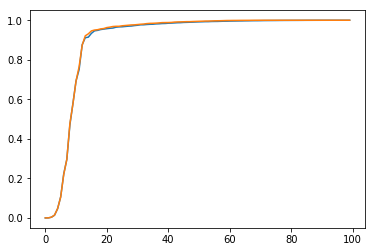

In [17]:
plt.plot(tc.train_eigenerrors)
plt.plot(tcp.train_eigenerrors)

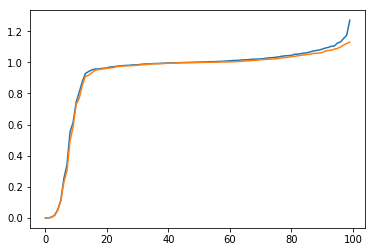

In [18]:
plt.plot(tc.test_eigenerrors)
plt.plot(tcp.test_eigenerrors)

In [24]:
f = np.power(iin, 5) - np.power(iin, 2)

In [25]:
d0 = tc.decode_raw(f)
d1 = tcp.decode_raw(f)

(array([ 1.,  1.,  3.,  1.,  8., 21., 16.,  7.,  4.,  8.]),
 array([-5.97839446, -5.60351088, -5.2286273 , -4.85374372, -4.47886014,
        -4.10397656, -3.72909298, -3.3542094 , -2.97932582, -2.60444224,
        -2.22955866]),
 <a list of 10 Patch objects>)

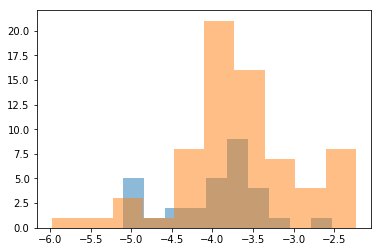

In [28]:
plt.hist(np.log10(np.abs(d0[tc.bad_neurons])), alpha = 0.5)
plt.hist(np.log10(np.abs(d0[~tc.bad_neurons])), alpha = 0.5)

In [616]:
n = 3
tc = tuning_curves(get_curve(n), Tarr, 0.1, iin, order = 0)
tc.gen_lmargins()
TPM = get_TPM(n)
N = len(TPM)
K = int(np.sqrt(N))
# plt.pcolormesh(tc.lmargins)
# plt.pcolormesh(TPM.reshape(K,K), cmap = 'bwr')


 28%|██████████████████████▎                                                         | 135/484 [03:42<09:35,  1.65s/it]


 56%|████████████████████████████████████████████▊                                   | 271/484 [07:24<05:44,  1.62s/it]


 84%|███████████████████████████████████████████████████████████████████▎            | 407/484 [10:59<02:02,  1.59s/it]


100%|████████████████████████████████████████████████████████████████████████████████| 484/484 [13:02<00:00,  1.57s/it]


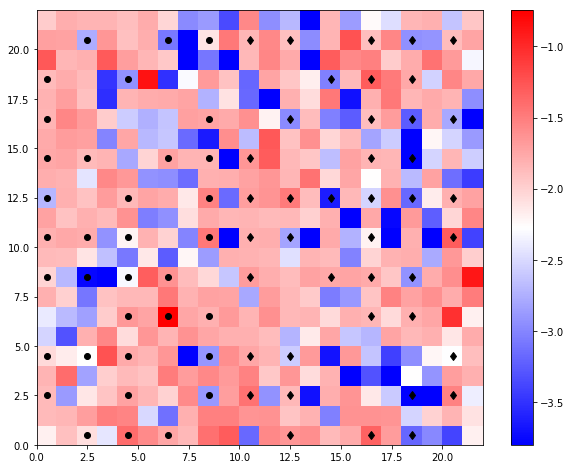

In [626]:
plt.figure(figsize = (10,8))
plt.pcolormesh(np.log10(tc.lmargins).reshape(K,K).T,cmap= 'bwr', vmin = -3.8)
TPM = TPM.reshape(K,K)
for nx in range(K):
    for ny in range(K):
        if (TPM[ny,nx] == 1):
            plt.plot(nx+0.5,ny+0.5, 'ko')
        if (TPM[ny,nx] == -1):
            plt.plot(nx + 0.5, ny + 0.5, 'kd')
plt.colorbar()

(array([  3.,   0.,   2.,   0.,   4.,   1.,   2.,   1.,   4.,   2.,   4.,
          5.,   6.,   6.,  14.,  20.,  23.,  20.,  14.,   7.,  18.,  30.,
         72., 132.,  58.,  20.,  12.,   0.,   1.,   3.]),
 array([-5.42650848, -5.27040287, -5.11429727, -4.95819166, -4.80208606,
        -4.64598045, -4.48987485, -4.33376924, -4.17766364, -4.02155803,
        -3.86545243, -3.70934682, -3.55324122, -3.39713561, -3.24103001,
        -3.0849244 , -2.9288188 , -2.77271319, -2.61660759, -2.46050198,
        -2.30439638, -2.14829077, -1.99218517, -1.83607956, -1.67997396,
        -1.52386835, -1.36776275, -1.21165714, -1.05555154, -0.89944593,
        -0.74334033]),
 <a list of 30 Patch objects>)

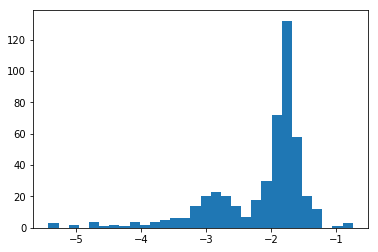

In [619]:
plt.hist(np.log10(tc.lmargins), bins = 30)

In [68]:
tc = tuning_curves(get_curve(0), Tarr, 0.1, iin, order = 0)

In [39]:
tc.N

64

In [40]:
fmaxes = []
for f in tc.eigenfunctions.T:
    fmaxes.append(tc.get_fmax(f))

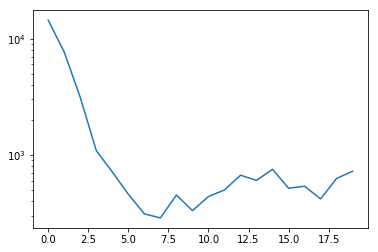

In [41]:
plt.plot(fmaxes[:20])
plt.yscale('log')

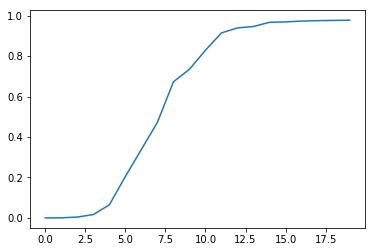

In [42]:
plt.plot(tc.eigenerrors[:20])

FMAX: 946.4952700379188 Hz
     pcost       dcost       gap    pres   dres
 0: -6.4653e+06 -6.4703e+06  4e+04  5e+00  9e-13
 1: -6.4653e+06 -6.4694e+06  3e+04  4e+00  8e-13
 2: -6.4564e+06 -6.4328e+06  5e+04  4e+00  9e-13
 3: -6.4526e+06 -6.4119e+06  5e+04  4e+00  1e-12
 4: -6.4427e+06 -6.3705e+06  8e+04  3e+00  9e-13
 5: -6.4307e+06 -6.3412e+06  8e+04  3e+00  6e-13
 6: -6.4112e+06 -6.2984e+06  9e+04  3e+00  1e-12
 7: -6.3401e+06 -6.2168e+06  2e+05  2e+00  9e-13
 8: -6.3279e+06 -6.1716e+06  2e+05  2e+00  7e-13
 9: -6.2918e+06 -6.1102e+06  2e+05  2e+00  1e-12
10: -6.2315e+06 -6.0352e+06  3e+05  1e+00  1e-12
11: -6.1461e+06 -5.9796e+06  3e+05  9e-01  1e-12
12: -6.0815e+06 -5.9385e+06  3e+05  7e-01  1e-12
13: -5.9656e+06 -5.9203e+06  2e+05  4e-01  1e-12
14: -5.9151e+06 -5.9134e+06  2e+05  2e-01  1e-12
15: -5.8610e+06 -5.8990e+06  2e+05  1e-01  9e-13
16: -5.8003e+06 -5.8438e+06  5e+04  3e-03  1e-12
17: -5.8040e+06 -5.8052e+06  1e+03  7e-05  2e-12
18: -5.8041e+06 -5.8042e+06  3e+01  1e-06  

Text(0.5,1,'Convex')

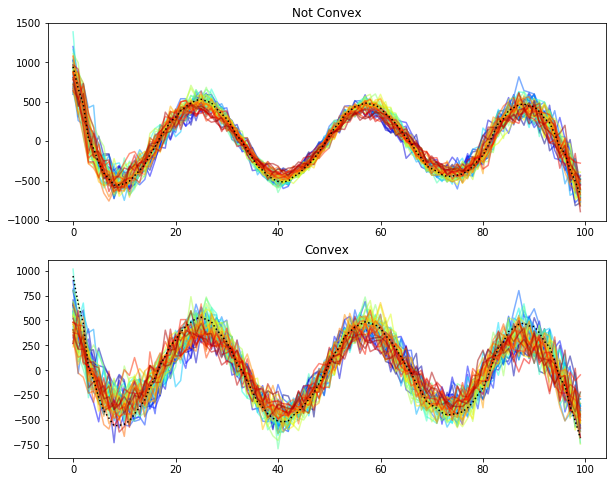

In [31]:
#Choose eigenfunction index, then calculate the Fmax for that given function.
findex = 7
f = tc.eigenfunctions.T[findex]
f = f/np.max(np.abs(f))
fmax = tc.get_fmax(f)*0.5
print('FMAX: ' + str(fmax) + ' Hz')

d_raw = tc.decode_raw(f*fmax)
d_cvx = tc.decode_cvx(f*fmax)

fig, ax = plt.subplots(2,1, figsize = (10,8))

for r in range(tc.R):
    T = tc.Tarr[r]
    ax[0].plot(tc.A[:,:,r]@(d_raw),
             color = cm.jet(r/tc.R), alpha = 0.5)
ax[0].plot(f*fmax, 'k:')
ax[0].set_title('Not Convex')

N = tc.N
Tarr = tc.Tarr
for r in range(tc.R):
    T = tc.Tarr[r]
    ax[1].plot(tc.A[:,:,r]@(d_cvx),
             color = cm.jet(r/tc.R), alpha = 0.5)
ax[1].plot(f*fmax, 'k:')
ax[1].set_title('Convex')


In [217]:
def fit(x, mu, lamba):
    return mu*np.exp(-lamba * x)

In [218]:
p, cov = curve_fit(fit, np.arange(100), function, p0=[function[0], 0.03])

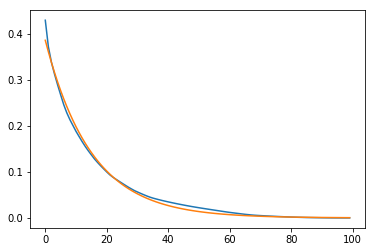

In [219]:
plt.plot(function)
plt.plot(fit(np.arange(100), *p))

In [201]:
from scipy.optimize import curve_fit

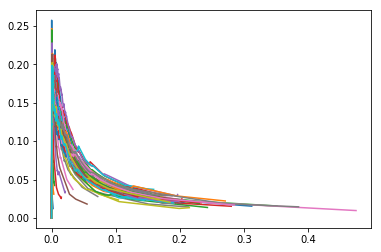

In [267]:
fmax = 50
mus = []
lambs = []
for findex in range(fmax):
    d = tc.decode_raw(tc.eigenfunctions.T[findex]/np.max(np.abs(tc.eigenfunctions.T[findex])))
    function = np.sum(np.abs(d))-np.cumsum(np.sort(np.abs(d))[::-1])
    p, cov = curve_fit(fit, np.arange(tc.N), function, p0=[function[0], 0.04])
    mus.append(p[0])
    lambs.append(p[1])
    plt.plot(np.sort(np.abs(d)), function[::-1]/np.sort(np.abs(d)) /tc.N)
mus = np.array(mus)
lambs = np.array(lambs)

In [303]:
from scipy.stats import expon


In [268]:
d = tc.decode_raw(tc.eigenfunctions.T[0]/np.max(np.abs(tc.eigenfunctions.T[0])))

In [305]:
loc, scale = expon.fit(np.abs(d))

In [331]:
expon.fit(np.abs(d))

(1.915855003541177e-07, 0.003971603432247279)

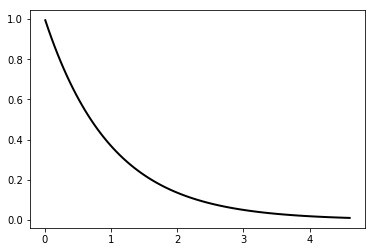

In [314]:
rv = expon(scale)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

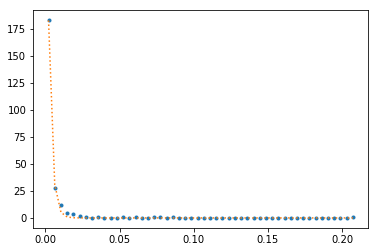

In [409]:
findex = 10
d = tc.decode_raw(tc.eigenfunctions.T[findex]/np.max(np.abs(tc.eigenfunctions.T[findex])))
lambd = 1/np.mean(np.abs(d))
y, x = np.histogram(np.abs(d), bins = 50)
x = 0.5*(x[1:] + x[:-1])
y = y/np.sum(y)/(x[1]-x[0])
p, cov = curve_fit(fit, x, y)
plt.plot(x,y, '.')
plt.plot(x, fit(x, *p), ':')

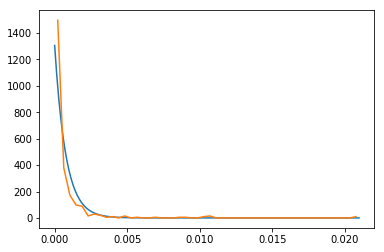

In [425]:
findex = 4
d = tc.decode_raw(tc.eigenfunctions.T[findex]/np.max(np.abs(tc.eigenfunctions.T[findex])))
lambd = 1/np.mean(np.abs(d))

x = np.linspace(0,np.max(np.abs(d)),300)
plt.plot(x, lambd*np.exp(-lambd*x))
y, x = np.histogram(np.abs(d), bins = 50)
x = 0.5*(x[1:] + x[:-1])
y = y/np.sum(y)/(x[1]-x[0])
plt.plot(x, y)

In [441]:
lambdas = []
for i in range(100):
    d = tc.decode_raw(tc.eigenfunctions.T[i]/np.max(np.abs(tc.eigenfunctions.T[i])))
    lambd = 1/np.mean(np.abs(d))
    lambdas.append(lambd)

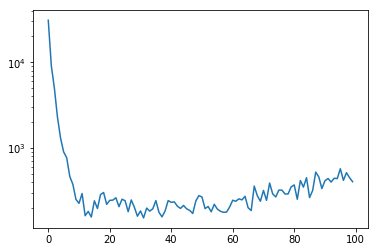

In [443]:
plt.plot(lambdas)
plt.yscale('log')

In [461]:
-1/np.log(0.95)

19.495725746223673

In [1040]:
tc = tuning_curves(get_curve(0), Tarr, 0.0, iin, order = 0)

In [1041]:
alphas = -1/np.log(np.linspace(0.01,0.95, 25))
N_fn = 15

espectrum = np.ndarray((len(alphas), N_fn))
fsats = np.ndarray((len(alphas), N_fn))

for alph_n, alpha in enumerate(alphas):
    for findex in range(N_fn):
        f = tc.eigenfunctions.T[findex]
        f = f/np.max(np.abs(f))
        fmax = tc.get_fmax(f)*alpha
        f = f*fmax
        
        d = tc.decode_cvx(f)
        fsats[alph_n, findex] = np.sum(np.abs(d) > 0.98)
        d /= fmax
        f /= fmax
        E = (d.T@tc.cs@d - 2*d.T@tc.W@f + f.T@ f)/(f.T@f.T)
        espectrum[alph_n, findex] = E

     pcost       dcost       gap    pres   dres
 0: -3.8975e+07 -3.8975e+07  2e+02  5e-17  7e-17
 1: -3.8975e+07 -3.8975e+07  2e+01  2e-16  9e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.5533e+06 -8.5535e+06  2e+02  5e-17  4e-16
 1: -8.5533e+06 -8.5533e+06  1e+01  2e-16  6e-16
 2: -8.5533e+06 -8.5533e+06  3e-01  2e-16  7e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.9123e+05 -6.9151e+05  7e+02  1e+00  3e-15
 1: -6.9123e+05 -6.9135e+05  1e+02  2e-01  3e-15
 2: -6.9123e+05 -6.9124e+05  1e+01  7e-03  5e-15
 3: -6.9123e+05 -6.9123e+05  2e-01  4e-05  4e-15
 4: -6.9123e+05 -6.9123e+05  3e-03  4e-07  7e-15
 5: -6.9123e+05 -6.9123e+05  3e-05  4e-09  3e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.2703e+05 -1.2725e+05  2e+02  5e-17  8e-15
 1: -1.2703e+05 -1.2705e+05  2e+01  2e-16  3e-15
 2: -1.2703e+05 -1.2703e+05  4e-01  2e-16  1e-14
 3: -1.2703e+05 -1.2703e+05  4e-03  2e-16  8e-15
O

     pcost       dcost       gap    pres   dres
 0: -4.2760e+07 -4.2761e+07  7e+02  1e+00  5e-16
 1: -4.2760e+07 -4.2760e+07  2e+02  3e-01  1e-15
 2: -4.2760e+07 -4.2760e+07  1e+02  7e-02  5e-16
 3: -4.2760e+07 -4.2760e+07  6e+01  2e-16  3e-16
 4: -4.2760e+07 -4.2760e+07  4e+00  2e-16  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.4557e+06 -3.4561e+06  2e+03  3e+00  1e-14
 1: -3.4556e+06 -3.4560e+06  6e+02  6e-01  5e-15
 2: -3.4556e+06 -3.4557e+06  7e+01  3e-16  2e-15
 3: -3.4556e+06 -3.4556e+06  4e+00  2e-16  3e-15
 4: -3.4556e+06 -3.4556e+06  8e-02  2e-16  2e-15
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.3505e+05 -6.3538e+05  1e+03  2e+00  1e-14
 1: -6.3505e+05 -6.3524e+05  3e+02  4e-01  1e-14
 2: -6.3503e+05 -6.3515e+05  1e+02  2e-16  4e-15
 3: -6.3504e+05 -6.3505e+05  9e+00  2e-16  5e-15
 4: -6.3504e+05 -6.3504e+05  2e-01  2e-16  1e-14
Optimal solution found.
     pcost       dcost       gap    pres   dres
 

Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6500e+04 -1.7086e+04  3e+03  4e+00  7e-13
 1: -1.6423e+04 -1.6970e+04  1e+03  1e+00  5e-13
 2: -1.3580e+04 -1.6115e+04  5e+03  6e-01  5e-13
 3: -1.4118e+04 -1.6331e+04  4e+03  4e-01  5e-13
 4: -1.4755e+04 -1.6275e+04  2e+03  2e-16  6e-13
 5: -1.4929e+04 -1.5065e+04  1e+02  2e-16  5e-13
 6: -1.4953e+04 -1.4959e+04  6e+00  2e-16  6e-13
 7: -1.4954e+04 -1.4955e+04  2e-01  2e-16  2e-13
 8: -1.4954e+04 -1.4954e+04  2e-03  2e-16  4e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.3883e+03 -4.7131e+03  9e+02  2e+00  1e-12
 1: -4.3840e+03 -4.5476e+03  2e+02  2e-01  2e-12
 2: -4.3637e+03 -4.4758e+03  1e+02  2e-16  2e-12
 3: -4.3779e+03 -4.3853e+03  7e+00  2e-16  8e-13
 4: -4.3804e+03 -4.3806e+03  2e-01  2e-16  1e-12
 5: -4.3805e+03 -4.3805e+03  2e-03  2e-16  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -4.9789e+03 -5.3503e+03  1e+03  2e+00  3e-13


 3: -3.4688e+03 -3.4827e+03  1e+01  5e-03  3e-13
 4: -3.4705e+03 -3.4708e+03  3e-01  9e-05  4e-13
 5: -3.4705e+03 -3.4705e+03  8e-03  1e-06  4e-13
 6: -3.4705e+03 -3.4705e+03  2e-04  1e-08  5e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.0345e+02 -1.2800e+03  1e+03  2e+00  6e-13
 1: -8.7755e+02 -1.1413e+03  5e+02  6e-01  2e-12
 2: -7.4079e+02 -1.0553e+03  3e+02  2e-02  5e-13
 3: -8.1420e+02 -8.3995e+02  3e+01  7e-04  2e-12
 4: -8.2674e+02 -8.2769e+02  9e-01  9e-06  3e-12
 5: -8.2745e+02 -8.2748e+02  2e-02  1e-07  1e-12
 6: -8.2747e+02 -8.2747e+02  1e-03  1e-09  5e-13
 7: -8.2747e+02 -8.2747e+02  2e-04  1e-11  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -6.4839e+08 -6.4839e+08  2e+03  3e+00  1e-16
 1: -6.4839e+08 -6.4839e+08  1e+03  1e+00  1e-16
 2: -6.4839e+08 -6.4839e+08  3e+03  5e-01  5e-17
 3: -6.4839e+08 -6.4839e+08  2e+03  9e-02  9e-17
 4: -6.4839e+08 -6.4839e+08  3e+02  8e-03  1e-16
 5: -6.4839e+08 -6.4839

Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.9349e+08 -9.9349e+08  3e+03  4e+00  1e-16
 1: -9.9349e+08 -9.9349e+08  2e+03  2e+00  3e-16
 2: -9.9349e+08 -9.9349e+08  4e+03  9e-01  3e-17
 3: -9.9349e+08 -9.9349e+08  3e+03  3e-01  2e-16
 4: -9.9349e+08 -9.9349e+08  2e+03  2e-01  8e-17
 5: -9.9349e+08 -9.9349e+08  3e+02  1e-02  6e-17
 6: -9.9349e+08 -9.9349e+08  8e+00  6e-05  5e-17
 7: -9.9349e+08 -9.9349e+08  2e-01  9e-07  6e-17
 8: -9.9349e+08 -9.9349e+08  2e-03  9e-09  8e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1803e+08 -2.1803e+08  2e+03  3e+00  3e-16
 1: -2.1803e+08 -2.1803e+08  1e+03  2e+00  1e-16
 2: -2.1803e+08 -2.1803e+08  1e+03  1e+00  2e-16
 3: -2.1802e+08 -2.1802e+08  1e+03  8e-01  5e-16
 4: -2.1802e+08 -2.1802e+08  9e+02  5e-01  2e-16
 5: -2.1802e+08 -2.1802e+08  8e+02  3e-01  4e-16
 6: -2.1802e+08 -2.1802e+08  4e+03  1e-01  3e-16
 7: -2.1802e+08 -2.1802e+08  2e+03  1e-03  5e-16
 8: -2.1802e+08 -2.1802

 6: -8.0364e+03 -8.0744e+03  4e+01  2e-16  7e-13
 7: -8.0432e+03 -8.0449e+03  2e+00  2e-16  4e-13
 8: -8.0436e+03 -8.0436e+03  5e-02  2e-16  1e-12
 9: -8.0436e+03 -8.0436e+03  8e-04  2e-16  9e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -8.2884e+03 -8.7476e+03  3e+03  4e+00  5e-13
 1: -8.2468e+03 -8.5975e+03  1e+03  1e+00  1e-12
 2: -7.8684e+03 -8.4631e+03  8e+02  2e-01  3e-13
 3: -7.9974e+03 -8.1210e+03  1e+02  2e-16  3e-13
 4: -8.0247e+03 -8.0315e+03  7e+00  2e-16  1e-12
 5: -8.0266e+03 -8.0268e+03  1e-01  2e-16  9e-13
 6: -8.0267e+03 -8.0267e+03  2e-03  2e-16  6e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.1317e+03 -2.5849e+03  3e+03  4e+00  1e-12
 1: -2.0385e+03 -2.4129e+03  1e+03  1e+00  5e-13
 2: -1.6239e+03 -2.2975e+03  1e+03  5e-01  9e-13
 3: -1.6751e+03 -2.0224e+03  3e+02  2e-16  1e-12
 4: -1.7356e+03 -1.7507e+03  2e+01  2e-16  2e-12
 5: -1.7397e+03 -1.7400e+03  2e-01  2e-16  1e-12
 6: -1.7398e+03 -1.7398

 2: -1.9626e+05 -1.9393e+05  1e+04  3e+00  9e-14
 3: -1.9239e+05 -1.7703e+05  2e+04  3e+00  2e-13
 4: -1.8576e+05 -1.6933e+05  2e+04  2e+00  4e-13
 5: -1.7926e+05 -1.6436e+05  2e+04  2e+00  4e-13
 6: -1.6616e+05 -1.5795e+05  2e+04  8e-01  2e-13
 7: -1.4917e+05 -1.5606e+05  2e+04  3e-01  4e-13
 8: -1.4829e+05 -1.5651e+05  2e+04  1e-01  2e-13
 9: -1.4807e+05 -1.5357e+05  5e+03  2e-16  3e-13
10: -1.4894e+05 -1.4945e+05  5e+02  2e-16  4e-13
11: -1.4907e+05 -1.4910e+05  3e+01  2e-16  3e-13
12: -1.4908e+05 -1.4908e+05  1e+00  2e-16  4e-13
13: -1.4908e+05 -1.4908e+05  6e-02  2e-16  4e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.5040e+04 -9.6071e+04  5e+04  2e+01  2e-13
 1: -8.9477e+04 -7.3110e+04  5e+04  2e+01  2e-13
 2: -6.1766e+04 -4.8615e+04  3e+04  5e+00  2e-13
 3: -4.3091e+04 -4.5917e+04  6e+03  3e-01  4e-13
 4: -4.2550e+04 -4.3620e+04  2e+03  8e-02  3e-13
 5: -4.1789e+04 -4.3639e+04  2e+03  2e-16  2e-13
 6: -4.2243e+04 -4.2449e+04  2e+02  2e-16  4e-

13: -6.8385e+08 -6.8385e+08  2e+03  2e-16  8e-16
14: -6.8385e+08 -6.8385e+08  2e+02  2e-16  8e-17
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -5.5271e+07 -5.5272e+07  2e+04  1e+01  3e-15
 1: -5.5269e+07 -5.5271e+07  9e+03  3e+00  1e-15
 2: -5.5269e+07 -5.5269e+07  9e+03  2e+00  5e-15
 3: -5.5266e+07 -5.5224e+07  2e+04  2e+00  4e-15
 4: -5.5216e+07 -5.5118e+07  8e+04  2e+00  2e-15
 5: -5.5205e+07 -5.5087e+07  9e+04  2e+00  7e-15
 6: -5.5199e+07 -5.5047e+07  1e+05  2e+00  2e-15
 7: -5.5151e+07 -5.4941e+07  2e+05  1e+00  4e-15
 8: -5.5117e+07 -5.4845e+07  2e+05  1e+00  8e-15
 9: -5.5078e+07 -5.4757e+07  2e+05  1e+00  9e-15
10: -5.5042e+07 -5.4621e+07  3e+05  9e-01  6e-15
11: -5.4947e+07 -5.4281e+07  4e+05  8e-01  2e-15
12: -5.4839e+07 -5.3975e+07  6e+05  7e-01  3e-15
13: -5.4795e+07 -5.4024e+07  7e+05  6e-01  7e-15
14: -5.4454e+07 -5.3576e+07  7e+05  5e-01  8e-15
15: -5.4192e+07 -5.3386e+07  7e+05  4e-01  2e-14
16: -5.3844e+07 -5.3022e+07  8e+05  3e-01  1e-

 0: -4.2559e+05 -4.2610e+05  2e+04  1e+01  6e-13
 1: -4.2434e+05 -4.1951e+05  2e+04  1e+01  2e-13
 2: -4.1487e+05 -4.0672e+05  2e+04  5e+00  3e-13
 3: -4.0661e+05 -3.6683e+05  4e+04  5e+00  3e-13
 4: -3.8974e+05 -3.4500e+05  4e+04  4e+00  4e-13
 5: -3.7516e+05 -3.3178e+05  3e+04  3e+00  2e-13
 6: -3.4720e+05 -3.1272e+05  3e+04  2e+00  3e-13
 7: -3.1493e+05 -2.9867e+05  8e+04  1e+00  2e-13
 8: -2.9990e+05 -2.9489e+05  5e+04  7e-01  2e-13
 9: -2.9026e+05 -2.9270e+05  5e+04  5e-01  4e-13
10: -2.8413e+05 -2.9094e+05  4e+04  3e-01  2e-13
11: -2.7161e+05 -2.8705e+05  2e+04  2e-02  9e-13
12: -2.7345e+05 -2.7492e+05  2e+03  2e-03  5e-13
13: -2.7380e+05 -2.7394e+05  1e+02  9e-05  2e-13
14: -2.7384e+05 -2.7385e+05  1e+01  1e-06  7e-13
15: -2.7384e+05 -2.7384e+05  3e-01  2e-08  1e-13
16: -2.7384e+05 -2.7384e+05  7e-03  2e-10  5e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.0034e+05 -2.0082e+05  1e+05  3e+01  2e-13
 1: -1.8185e+05 -1.4403e+05  1e+05  2e+01  6e-

 1: -3.5969e+04 -3.6261e+04  5e+03  3e+00  3e-13
 2: -3.4013e+04 -3.5000e+04  4e+03  1e+00  6e-13
 3: -3.3799e+04 -3.4587e+04  2e+03  5e-01  4e-13
 4: -3.3726e+04 -3.4269e+04  1e+03  3e-01  1e-12
 5: -3.3113e+04 -3.4135e+04  1e+03  9e-02  1e-12
 6: -3.3328e+04 -3.3691e+04  4e+02  2e-16  9e-13
 7: -3.3407e+04 -3.3430e+04  2e+01  2e-16  1e-12
 8: -3.3413e+04 -3.3413e+04  4e-01  3e-16  5e-13
 9: -3.3413e+04 -3.3413e+04  5e-03  2e-16  5e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -9.3164e+03 -9.7544e+03  1e+04  8e+00  4e-13
 1: -8.6872e+03 -8.9535e+03  6e+03  4e+00  1e-12
 2: -6.8076e+03 -7.7277e+03  6e+03  2e+00  9e-13
 3: -6.1010e+03 -7.3082e+03  3e+03  4e-01  7e-13
 4: -5.9897e+03 -6.3259e+03  3e+02  2e-16  2e-12
 5: -6.0363e+03 -6.0481e+03  1e+01  2e-16  6e-13
 6: -6.0383e+03 -6.0386e+03  3e-01  2e-16  7e-13
 7: -6.0384e+03 -6.0384e+03  4e-03  2e-16  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -7.3445e+09 -7.3445

     pcost       dcost       gap    pres   dres
 0: -1.8415e+08 -1.8415e+08  6e+04  2e+01  2e-15
 1: -1.8414e+08 -1.8415e+08  3e+04  7e+00  4e-15
 2: -1.8415e+08 -1.8414e+08  3e+04  5e+00  2e-15
 3: -1.8413e+08 -1.8392e+08  6e+04  5e+00  6e-15
 4: -1.8400e+08 -1.8351e+08  2e+05  5e+00  6e-15
 5: -1.8394e+08 -1.8334e+08  3e+05  4e+00  3e-15
 6: -1.8392e+08 -1.8314e+08  3e+05  4e+00  4e-15
 7: -1.8374e+08 -1.8265e+08  7e+05  4e+00  9e-15
 8: -1.8366e+08 -1.8224e+08  9e+05  3e+00  7e-15
 9: -1.8343e+08 -1.8153e+08  1e+06  3e+00  1e-14
10: -1.8333e+08 -1.8076e+08  1e+06  3e+00  7e-15
11: -1.8311e+08 -1.7870e+08  2e+06  2e+00  6e-15
12: -1.8257e+08 -1.7611e+08  3e+06  2e+00  5e-15
13: -1.8227e+08 -1.7547e+08  3e+06  2e+00  5e-15
14: -1.8026e+08 -1.7120e+08  4e+06  2e+00  3e-14
15: -1.7975e+08 -1.6716e+08  6e+06  2e+00  1e-14
16: -1.7900e+08 -1.6525e+08  6e+06  1e+00  5e-15
17: -1.7391e+08 -1.5713e+08  8e+06  1e+00  2e-14
18: -1.7245e+08 -1.5475e+08  9e+06  1e+00  1e-14
19: -1.6798e+08 -1.48

     pcost       dcost       gap    pres   dres
 0: -5.0263e+07 -5.0263e+07  3e+04  2e+01  2e-14
 1: -5.0262e+07 -5.0260e+07  2e+04  1e+01  2e-14
 2: -5.0260e+07 -5.0254e+07  2e+04  6e+00  2e-14
 3: -5.0209e+07 -5.0092e+07  1e+05  6e+00  7e-15
 4: -5.0113e+07 -5.0050e+07  3e+05  5e+00  1e-14
 5: -5.0102e+07 -4.9920e+07  3e+05  4e+00  1e-14
 6: -5.0093e+07 -4.9720e+07  3e+05  4e+00  6e-15
 7: -5.0032e+07 -4.9414e+07  4e+05  4e+00  7e-15
 8: -4.9930e+07 -4.8940e+07  6e+05  4e+00  1e-14
 9: -4.9779e+07 -4.8406e+07  9e+05  3e+00  1e-14
10: -4.9594e+07 -4.7882e+07  1e+06  3e+00  2e-14
11: -4.9304e+07 -4.6704e+07  2e+06  3e+00  3e-14
12: -4.9153e+07 -4.5831e+07  2e+06  3e+00  2e-14
13: -4.9060e+07 -4.5180e+07  2e+06  3e+00  2e-14
14: -4.8399e+07 -4.3158e+07  3e+06  2e+00  3e-14
15: -4.7597e+07 -4.1279e+07  3e+06  2e+00  3e-14
16: -4.6541e+07 -3.8367e+07  4e+06  2e+00  5e-14
17: -4.1918e+07 -3.3894e+07  5e+06  1e+00  3e-14
18: -3.7117e+07 -3.1885e+07  4e+06  5e-01  6e-14
19: -3.2804e+07 -3.14

 1: -1.0268e+05 -1.0231e+05  1e+04  5e+00  7e-13
 2: -1.0219e+05 -1.0083e+05  9e+03  4e+00  2e-13
 3: -9.4447e+04 -9.2137e+04  1e+04  2e+00  7e-13
 4: -7.5027e+04 -9.6412e+04  4e+04  1e+00  6e-13
 5: -7.7481e+04 -1.0002e+05  4e+04  4e-01  1e-12
 6: -6.8593e+04 -1.0449e+05  5e+04  2e-01  9e-13
 7: -7.6474e+04 -1.0104e+05  2e+04  7e-03  8e-13
 8: -8.1068e+04 -8.3887e+04  3e+03  6e-04  2e-12
 9: -8.2143e+04 -8.2467e+04  3e+02  3e-05  2e-12
10: -8.2275e+04 -8.2287e+04  1e+01  2e-07  8e-13
11: -8.2279e+04 -8.2279e+04  2e-01  3e-09  2e-12
12: -8.2279e+04 -8.2279e+04  2e-03  3e-11  6e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.0375e+05 -1.0397e+05  2e+04  1e+01  7e-13
 1: -1.0292e+05 -1.0223e+05  1e+04  6e+00  7e-13
 2: -9.6989e+04 -9.7395e+04  1e+04  3e+00  4e-13
 3: -9.5422e+04 -9.6006e+04  7e+03  1e+00  2e-13
 4: -7.9628e+04 -9.6274e+04  3e+04  9e-01  4e-13
 5: -8.2258e+04 -9.6607e+04  3e+04  5e-01  9e-13
 6: -7.4344e+04 -9.6743e+04  4e+04  3e-01  7e-

11: -2.4747e+05 -2.4747e+05  3e-01  8e-08  1e-12
12: -2.4747e+05 -2.4747e+05  3e-03  8e-10  4e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6581e+05 -1.6556e+05  3e+04  1e+01  1e-12
 1: -1.6357e+05 -1.6235e+05  2e+04  6e+00  2e-12
 2: -1.6277e+05 -1.5937e+05  1e+04  5e+00  2e-12
 3: -1.5293e+05 -1.4544e+05  1e+04  2e+00  2e-12
 4: -1.2110e+05 -1.4807e+05  6e+04  2e+00  2e-12
 5: -1.1470e+05 -1.4641e+05  7e+04  8e-01  1e-12
 6: -9.6366e+04 -1.4809e+05  1e+05  6e-01  8e-13
 7: -9.4206e+04 -1.6877e+05  8e+04  7e-02  3e-13
 8: -1.1412e+05 -1.2575e+05  1e+04  4e-03  1e-12
 9: -1.1850e+05 -1.2108e+05  3e+03  6e-04  8e-13
10: -1.1953e+05 -1.1983e+05  3e+02  6e-05  5e-13
11: -1.1967e+05 -1.1968e+05  7e+00  8e-07  2e-12
12: -1.1967e+05 -1.1967e+05  2e-01  1e-08  2e-12
13: -1.1967e+05 -1.1967e+05  7e-03  1e-10  1e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.6546e+05 -1.6521e+05  3e+04  2e+01  2e-13
 1: -1.6408e+05 -1.6224

 0: -6.5945e+05 -6.5528e+05  9e+04  3e+01  5e-13
 1: -6.4360e+05 -6.3531e+05  1e+05  2e+01  2e-12
 2: -6.2126e+05 -6.0977e+05  7e+04  8e+00  2e-12
 3: -6.0345e+05 -5.9809e+05  6e+04  4e+00  2e-12
 4: -5.4538e+05 -5.7893e+05  1e+05  3e+00  2e-12
 5: -4.2505e+05 -5.0594e+05  3e+05  2e+00  4e-13
 6: -4.1481e+05 -4.5536e+05  2e+05  1e+00  1e-12
 7: -3.7881e+05 -4.2690e+05  1e+05  3e-01  3e-13
 8: -3.7870e+05 -3.8902e+05  1e+04  2e-02  2e-12
 9: -3.8137e+05 -3.8270e+05  2e+03  2e-03  3e-12
10: -3.8176e+05 -3.8192e+05  2e+02  2e-04  2e-12
11: -3.8181e+05 -3.8182e+05  5e+00  2e-06  1e-12
12: -3.8181e+05 -3.8181e+05  5e-02  2e-08  2e-12
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -2.9539e+05 -2.9401e+05  5e+04  2e+01  7e-13
 1: -2.9110e+05 -2.8781e+05  3e+04  9e+00  1e-12
 2: -2.8959e+05 -2.8160e+05  3e+04  7e+00  9e-13
 3: -2.7330e+05 -2.5585e+05  2e+04  4e+00  1e-12
 4: -2.1616e+05 -2.5451e+05  1e+05  2e+00  8e-13
 5: -1.9625e+05 -2.4253e+05  1e+05  1e+00  6e-

 4: -1.1795e+06 -1.1463e+06  9e+04  5e+00  1e-12
 5: -1.1630e+06 -1.0378e+06  1e+05  5e+00  2e-13
 6: -1.1345e+06 -9.7219e+05  1e+05  4e+00  6e-13
 7: -9.9092e+05 -7.8171e+05  2e+05  2e+00  5e-13
 8: -9.7658e+05 -7.2886e+05  2e+05  2e+00  4e-13
 9: -8.3665e+05 -6.0534e+05  2e+05  2e+00  9e-13
10: -5.7439e+05 -5.4364e+05  1e+05  4e-01  4e-13
11: -5.0605e+05 -5.3361e+05  7e+04  9e-02  4e-13
12: -4.9582e+05 -5.0479e+05  9e+03  1e-04  3e-13
13: -4.9808e+05 -4.9907e+05  1e+03  1e-05  4e-13
14: -4.9841e+05 -4.9845e+05  3e+01  2e-16  9e-13
15: -4.9842e+05 -4.9842e+05  1e+00  2e-16  1e-12
16: -4.9842e+05 -4.9842e+05  6e-02  2e-16  6e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.4262e+06 -1.4146e+06  2e+05  4e+01  2e-12
 1: -1.3915e+06 -1.3696e+06  2e+05  3e+01  2e-12
 2: -1.3442e+06 -1.3120e+06  1e+05  1e+01  5e-13
 3: -1.3045e+06 -1.2819e+06  1e+05  7e+00  3e-12
 4: -1.1737e+06 -1.2246e+06  3e+05  4e+00  2e-12
 5: -7.8871e+05 -1.0069e+06  8e+05  3e+00  8e-

11: -2.3185e+06 -2.3896e+06  7e+04  2e-03  1e-13
12: -2.3369e+06 -2.3456e+06  9e+03  2e-04  4e-13
13: -2.3401e+06 -2.3408e+06  7e+02  9e-06  2e-13
14: -2.3403e+06 -2.3404e+06  8e+01  4e-07  5e-13
15: -2.3404e+06 -2.3404e+06  1e+00  5e-09  2e-13
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -1.5670e+07 -1.5613e+07  2e+06  1e+02  5e-13
 1: -1.5585e+07 -1.5480e+07  1e+06  6e+01  1e-12
 2: -1.1423e+07 -1.1019e+07  9e+06  6e+01  8e-13
 3: -1.1392e+07 -1.0693e+07  8e+06  5e+01  2e-13
 4: -6.9515e+06 -7.1043e+06  9e+06  2e+01  5e-13
 5: -6.9536e+06 -6.7637e+06  7e+06  1e+01  8e-13
 6: -5.8521e+06 -4.4613e+06  8e+06  9e+00  3e-13
 7: -4.5312e+06 -3.2606e+06  5e+06  5e+00  6e-13
 8: -2.0253e+06 -2.6714e+06  3e+06  1e+00  3e-13
 9: -1.6994e+06 -2.2391e+06  9e+05  2e-01  1e-13
10: -1.7599e+06 -1.8840e+06  1e+05  2e-16  4e-13
11: -1.8007e+06 -1.8164e+06  2e+04  2e-16  7e-14
12: -1.8073e+06 -1.8095e+06  2e+03  2e-16  5e-13
13: -1.8082e+06 -1.8085e+06  3e+02  2e-16  5e-

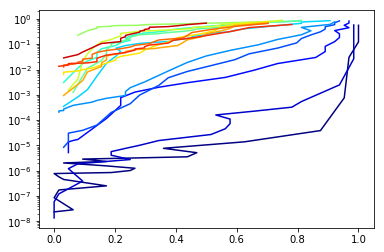

In [1042]:
for n in range(N_fn):
    plt.plot(fsats.T[n]/tc.N, (espectrum.T[n] - tc.eigenerrors[n])/(1-tc.eigenerrors[n]), c = cm.jet(n/N_fn))
plt.yscale('log')

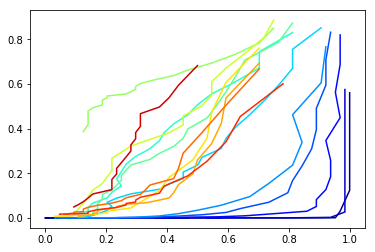

In [1043]:
for n in range(N_fn):
    plt.plot(fsats.T[n,2:]/tc.N, (espectrum.T[n,2:] - tc.eigenerrors[n])/(1-tc.eigenerrors[n]), c = cm.jet(n/N_fn))

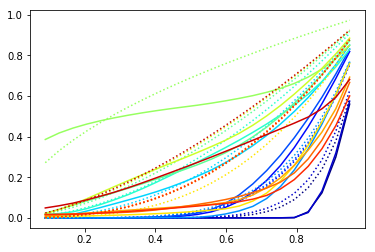

In [1044]:
gammas = []
for n in range(N_fn):
    beta = (espectrum.T[n,2:] - tc.eigenerrors[n])/(1-tc.eigenerrors[n])
#     fs = fsats.T[n,2:]/tc.N
    fs = np.exp(-1/alphas[2:])
    x = np.log(fs)
    y = np.log(beta)
    gamma = x.T@y/(x.T@x)
    plt.plot(fs, beta, c = cm.jet(n/N_fn))
    plt.plot(fs, fs**gamma, ':', c = cm.jet(n/N_fn))
    gammas.append(gamma)
# plt.yscale('log')

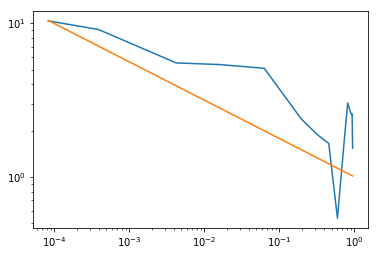

In [1051]:
gammas = np.array(gammas)
plt.plot(tc.eigenerrors[:N_fn], gammas)
plt.plot(tc.eigenerrors[:N_fn], tc.eigenerrors[:N_fn]**(-0.25))
plt.yscale('log')
plt.xscale('log')

In [1010]:
p = np.polyfit(np.log(tc.eigenerrors[:N_fn]), np.log(gammas), 1)
print(p)

[-0.22016493  0.19958158]


In [1011]:
np.exp(p[1])

1.2208918114488645

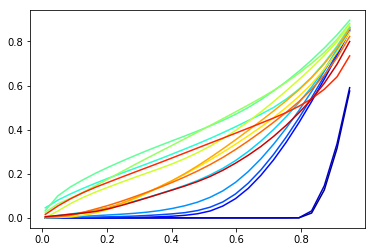

In [989]:
for n in range(N_fn):
    plt.plot(np.exp(-1/alphas), (espectrum.T[n] - tc.eigenerrors[n])/(1-tc.eigenerrors[n]), c = cm.jet(n/N_fn))

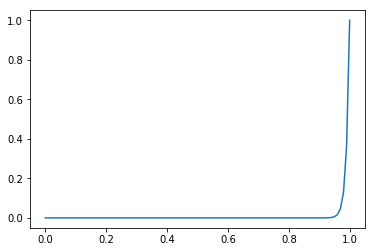

In [986]:
x = np.linspace(0,1,100)
plt.plot(x,x**100)

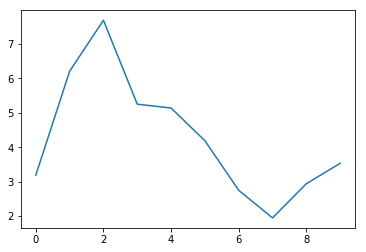

In [967]:
plt.plot(a)

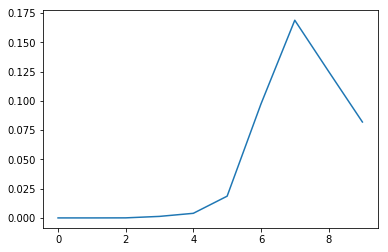

In [968]:
plt.plot(np.exp(b))

In [971]:
a = []
b = []
for n in range(N_fn):
    x = fsats.T[n,5:-5]/tc.N
#     x = np.exp(-1/alphas)[6:-6]
    y = np.log((espectrum.T[n,5:-5] - tc.eigenerrors[n])/(1-tc.eigenerrors[n]))
    p = np.polyfit(x,y,1)
    a.append(p[0])
    b.append(p[1])

In [941]:
a0 = a

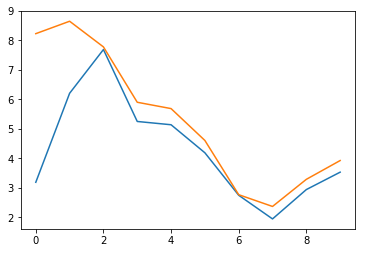

In [963]:
plt.plot(a)
plt.plot(a0)

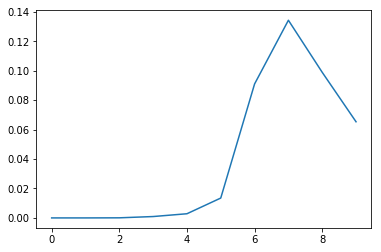

In [934]:
plt.plot(np.exp(b))

In [922]:
lambdas = []
for findex in range(N_fn):
    f = tc.eigenfunctions.T[findex]
    f = f/np.max(np.abs(f))
    fmax = tc.get_fmax(f)
    lambdas.append(fmax)
lambdas = np.array(lambdas)

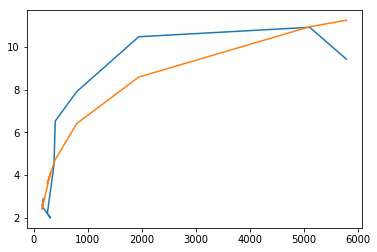

In [930]:
plt.plot(lambdas, a)
p = np.polyfit(np.log(lambdas), a, 1)
plt.plot(lambdas, p[0]*np.log(lambdas) + p[1])

In [929]:
p

array([ 2.44108437, -9.8932906 ])

In [ ]:
plt.plot()

In [905]:
np.exp(-1/alphas)

array([0.001     , 0.03372414, 0.06644828, 0.09917241, 0.13189655,
       0.16462069, 0.19734483, 0.23006897, 0.2627931 , 0.29551724,
       0.32824138, 0.36096552, 0.39368966, 0.42641379, 0.45913793,
       0.49186207, 0.52458621, 0.55731034, 0.59003448, 0.62275862,
       0.65548276, 0.6882069 , 0.72093103, 0.75365517, 0.78637931,
       0.81910345, 0.85182759, 0.88455172, 0.91727586, 0.95      ])

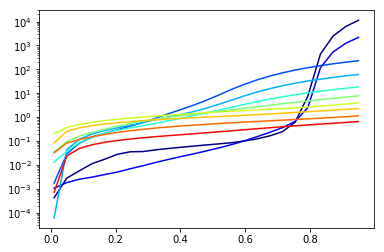

In [893]:
for n in range(N_fn):
    plt.plot(np.exp(-1/alphas), (espectrum.T[n] - tc.eigenerrors[n])/tc.eigenerrors[n], c = cm.jet(n/N_fn))
plt.yscale('log')

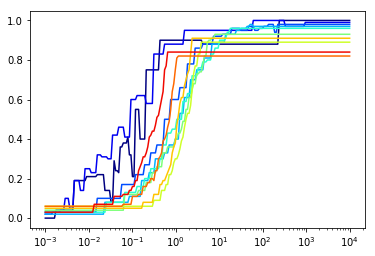

In [890]:
for n in range(N_fn):
    plt.plot(betas, fsat_b.T[n]/tc.N, c = cm.jet(n/N_fn))
plt.xscale('log')

Text(0.5,0,'$f_{sat}$')

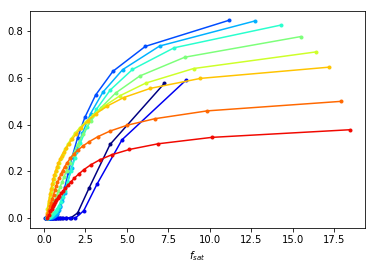

In [875]:
for n in range(N_fn):
    plt.plot((tc.eigenerrors[n])**(0.1)*(alphas), (espectrum.T[n] - tc.eigenerrors[n]), '.-', c = cm.jet(n/N_fn))
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('$f_{sat}$')

In [508]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [547]:
def gen_log(z, alpha):
    return np.power(1+np.exp(-z), -alpha)

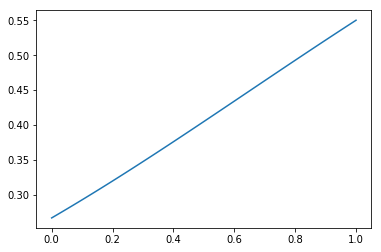

In [563]:
x = np.linspace(0,1,100)
alpha = -np.log(tc.eigenerrors[10])/np.log(2)
plt.plot(x, gen_log(x, alpha))

In [533]:
def error(fsat, epsilon):
    beta = 1/np.log(2/epsilon - 1)
    return 2*sigmoid((fsat-1)/beta)

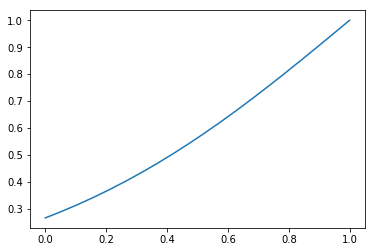

In [542]:
fsat = np.linspace(0,1,20)
plt.plot(fsat, error(fsat, tc.eigenerrors[10]))

Text(0,0.5,'Error')

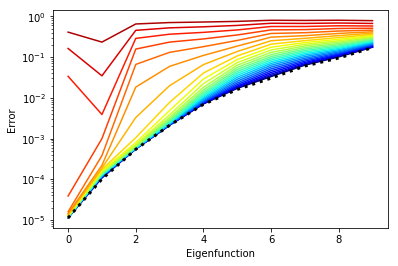

In [463]:
for an in range(len(alphas)):
    plt.plot(espectrum[an], c = cm.jet(an/len(alphas)))
plt.plot(tc.eigenerrors[:N_fn], 'k:', lw = 3)
plt.yscale('log')
plt.xlabel('Eigenfunction')
plt.ylabel('Error')

In [634]:
-1/np.log(0.8)

4.481420117724551

In [469]:
fsat = np.exp(-1/alphas)

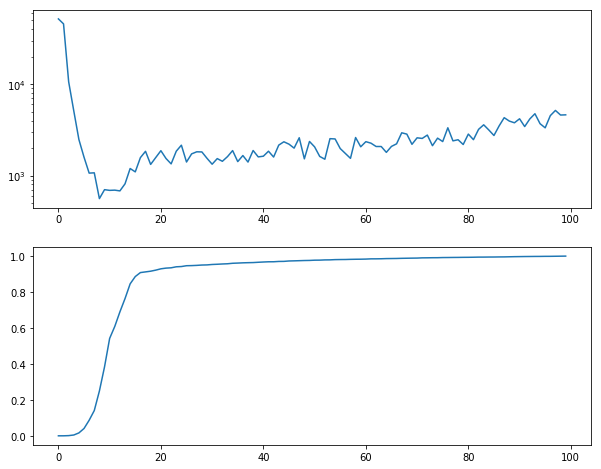

In [397]:
fig, ax = plt.subplots(2,1,figsize = (10,8))
ax[0].plot(fmaxes)
ax[0].set_yscale('log')
ax[1].plot(tc0.eigenerrors)

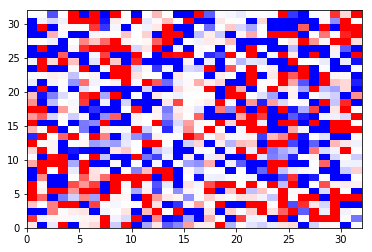

In [155]:
plt.pcolormesh(d_star1[:N].reshape(32,32), cmap = 'bwr')

(-1, 1)

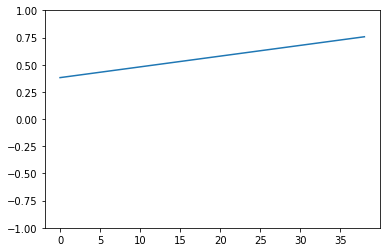

In [176]:
index = 15
plt.plot(Tarr, d_star1[index] + Tarr*d_star1[index+N])
plt.ylim(-1,1)

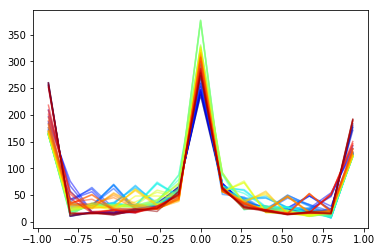

In [207]:
for r in range(tc.R):
    T = Tarr[r]
    y,x = np.histogram(d_star1[:N] + T*d_star1[N:], bins = 15)
    x = (x[1:] + x[:-1])/2
    plt.plot(x,y, c = cm.jet(r/tc.R), alpha = 0.5)

In [63]:
def convex_opt_LSAT(tc, f):
    N = tc.N
    P= tc.cs
    q = -tc.W @ f_goal
    G = np.zeros((2*N, N))
    G[:N,:] = np.eye(N)
    G[N:, :] = -np.eye(N)
    h = np.ones(N*2)
    
    P = matrix(P)
    q = matrix(q)
    G = matrix(G)
    h = matrix(h)
    
    solution = qp(P, q, G, h)
    weights = np.array(solution['x'])
    return weights.reshape(-1)

In [106]:
def convex_opt_LINT(tc, f, T1 = None, T2 = None):
    if(T1 is None):
        T1 = np.max(tc.Tarr)
    if(T2 is None):
        T2 = np.min(tc.Tarr)
    N = tc.N
    P= tc.cs
    q = -tc.W @ f_goal
    G = np.zeros((4*N, 2*N))
    I = np.eye(N)
    G[:N,:N] = I
    G[:N,N:] = T1*I
    G[N:2*N, :N] = -I
    G[N:2*N, N:] = -T1*I
    G[2*N:3*N, :N] = I
    G[2*N:3*N, N:] = T2*I
    G[3*N:, :N] = -I
    G[3*N:, N:] = -T2*I
    
    h = np.ones(4*N)
    
    P = matrix(P)
    q = matrix(q)
    G = matrix(G)
    h = matrix(h)
    
    solution = qp(P, q, G, h)
    weights = np.array(solution['x'])
    return weights.reshape(-1)

In [88]:
iin = np.linspace(-1,1,100).reshape(100,1)
f_goal = iin**2*1000

In [89]:
A = get_curve(0)
A = A[:,:,0]
Q, N = A.shape
d_init = np.linalg.inv(A.T@A + 0.3*np.eye(N)) @ A.T @f_goal
d_init = d_init.reshape(N)

In [90]:
d_new = run_cvx_opt(A, f_goal, 1, 0).reshape(N)

(100, 1)
(100, 1)
(64, 1)


In [3]:
def SMinv(Cinv, u, v):
    alpha = Cinv@u
    return Cinv - alpha@v.T@Cinv / (1+v.T@alpha)

In [563]:
A = get_curve(-1)
tc0 = tuning_curves(A, Tarr, 0, iin, order = 0)
tc1 = tuning_curves(A, Tarr, 0, iin, order = 1)

In [564]:
fmaxes0 = []
fmaxes1 = []
for i in range(tc0.Q):
    fmaxes0.append(tc0.get_fmax(tc0.eigenfunctions.T[i]))
    fmaxes1.append(tc1.get_fmax(tc1.eigenfunctions.T[i]))

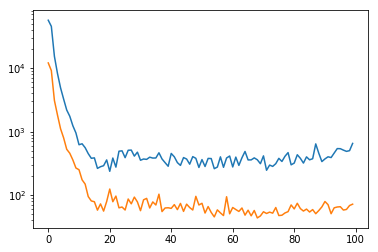

In [565]:
plt.plot(fmaxes0)
plt.plot(fmaxes1)
plt.yscale('log')

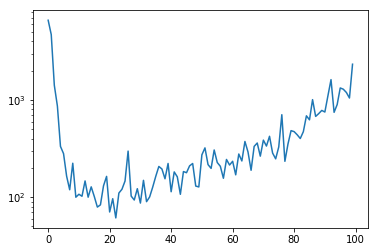

In [500]:
plt.plot(tc.fmaxes)
plt.yscale('log')

In [501]:
tc.decode_cvx(f_goal)

     pcost       dcost       gap    pres   dres
 0: -4.3762e+07 -4.3114e+07  2e+07  3e+02  4e-13
 1: -4.2440e+07 -3.9607e+07  2e+07  2e+02  6e-13
 2: -4.0871e+07 -3.7558e+07  1e+07  1e+02  1e-12
 3: -3.8803e+07 -3.6103e+07  7e+06  6e+01  6e-13
 4: -3.8352e+07 -3.4211e+07  7e+06  5e+01  3e-12
 5: -3.3164e+07 -2.7123e+07  9e+06  3e+01  1e-12
 6: -3.0479e+07 -2.4848e+07  9e+06  2e+01  3e-12
 7: -2.8960e+07 -2.1741e+07  9e+06  2e+01  4e-12
 8: -2.5341e+07 -1.6118e+07  1e+07  1e+01  1e-12
 9: -2.2943e+07 -1.2890e+07  1e+07  1e+01  2e-12
10: -1.7282e+07 -9.9323e+06  9e+06  6e+00  2e-12
11: -1.5100e+07 -8.8109e+06  8e+06  5e+00  5e-13
12: -1.1570e+07 -7.3272e+06  7e+06  3e+00  4e-13
13: -7.6576e+06 -6.7985e+06  4e+06  1e+00  6e-13
14: -6.4372e+06 -6.7453e+06  4e+06  6e-01  2e-13
15: -5.5549e+06 -5.8079e+06  7e+05  8e-02  8e-13
16: -5.4876e+06 -5.5277e+06  9e+04  1e-02  9e-13
17: -5.4902e+06 -5.4967e+06  1e+04  1e-03  4e-13
18: -5.4918e+06 -5.4928e+06  1e+03  1e-04  3e-13
19: -5.4921e+06 -5.49

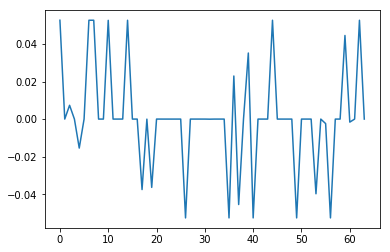

In [505]:
plt.plot(tc.cvx_decoders['0'][tc.N:])

In [447]:
tc.raw_decoders['0']

array([-2.63171382e+01, -1.45180329e+01, -3.47410533e-01,  1.02250845e+00,
       -1.19309143e+00,  1.94096844e+01, -2.62757576e+00, -1.39460598e+00,
        2.61577765e+01, -3.14597312e+00,  2.82481411e+00,  5.43495937e+01,
       -1.22375318e+02, -2.82289139e+01, -1.83741876e+01,  1.27085609e+01,
        8.28985922e+00, -8.81949083e-01,  1.41087439e+02, -2.74850480e+01,
        7.18672629e+01,  1.71276026e+02,  2.12647817e+02, -4.94207445e+01,
       -2.56061648e+01,  1.66224650e+01, -4.41818525e+00, -2.08299435e+01,
       -2.41657624e+01,  1.49092598e+01,  1.08762728e+01,  7.20800485e+02,
       -5.01950830e+00, -1.32187431e+01,  3.65233287e+00, -8.25218278e+00,
       -3.08858019e-01, -9.45143955e-01, -7.89628850e+00, -1.43806830e+00,
       -6.44823061e+01,  2.32043413e+01,  4.07266851e+00, -1.09713462e+00,
       -2.19806427e+00, -8.74614349e-01, -6.62026283e+00,  7.22271176e+00,
        2.60020032e+00,  2.63165440e+01,  3.96840265e+00,  2.74927389e+01,
       -7.55990217e+00,  

In [11]:
A = get_curve(1)
Q, N, R = A.shape
sigmas = np.array([0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 2, 5])
tc0 = tuning_curves(A, Tarr, 0.02, iin, mode = 'cross-validate', order = 0)
# test_r = tc0.test_r
# tc1 = tuning_curves(A, Tarr, sigma, iin, mode = 'cross-validate', order = 1, test_r = test_r)
# tc2 = tuning_curves(A, Tarr, sigma, iin, mode = 'cross-validate', order = 2, test_r = test_r)

In [12]:
metric = tc0.train_eigenfunctions
metric = metric[:,:15]
tc0.update_metric(metric)

In [13]:
Nsig = len(sigmas)
train_eigenerrors = np.ndarray((Nsig, Q))
test_eigenerrors = np.ndarray((Nsig, Q))
train_margins = np.ndarray((Nsig, N))
test_margins = np.ndarray((Nsig, N))
for n, sigma in enumerate(sigmas):
    tc0.update_sigma(sigma)
    tc0.gen_lmargins()
    train_eigenerrors[n] = tc0.train_eigenerrors
    test_eigenerrors[n] = tc0.test_eigenerrors
    train_margins[n] = tc0.train_lmargins
    test_margins[n] = tc0.test_lmargins

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:11<00:00,  1.35it/s]


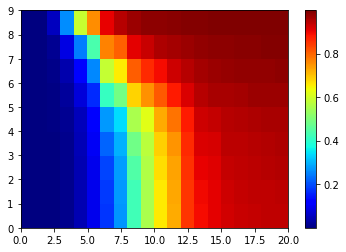

In [354]:
plt.pcolormesh(train_eigenerrors[:,:20], cmap = 'jet')
plt.colorbar()

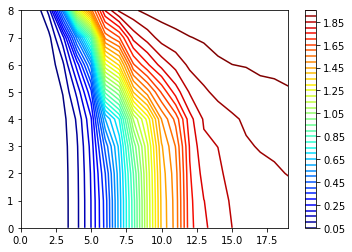

In [361]:
plt.contour((train_eigenerrors + test_eigenerrors)[:,:20], 40, cmap = 'jet')
plt.colorbar()

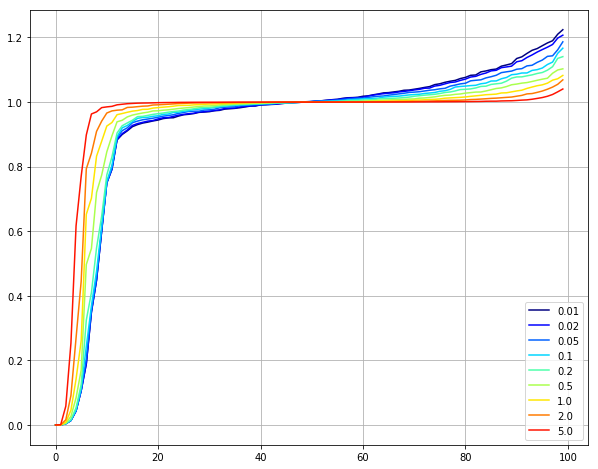

In [427]:
plt.figure(figsize = (10,8))
for n in range(Nsig):
    plt.plot(test_eigenerrors[n,:], c = cm.jet(n/Nsig), label = sigmas[n])
plt.grid()
plt.legend()

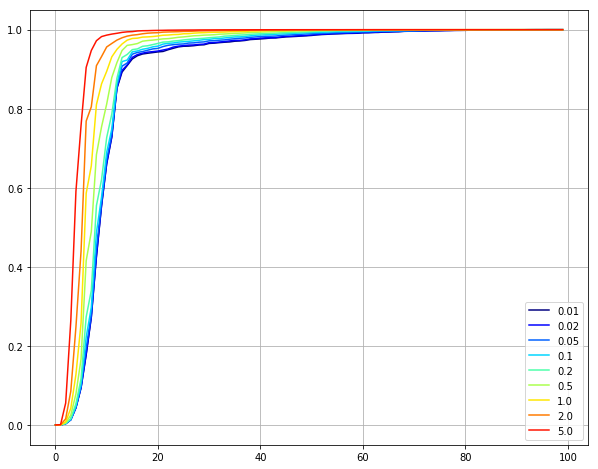

In [428]:
plt.figure(figsize = (10,8))
for n in range(Nsig):
    plt.plot(train_eigenerrors[n,:], c = cm.jet(n/Nsig), label = sigmas[n])
plt.grid()
plt.legend()

(-0.04, 0.1)

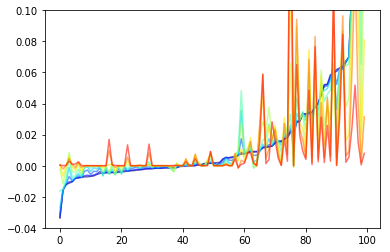

In [484]:
srt = np.argsort(test_margins[0])
for n in range(Nsig):
    plt.plot((test_margins[n])[srt], color = cm.jet(n/Nsig), alpha = 0.6)
plt.ylim([-0.04,0.1])

(-0.04, 0.1)

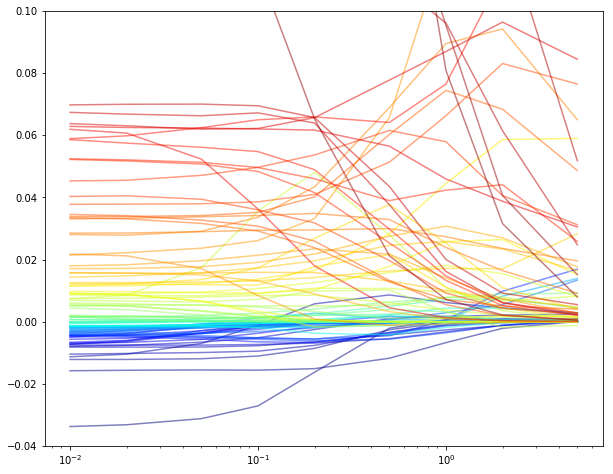

In [514]:
plt.figure(figsize = (10,8))
srt = np.argsort(test_margins[0,:])
for index in range(N):
    plt.plot(sigmas, test_margins[:,srt[index]], c = cm.jet(index/N), alpha = 0.5)
plt.xscale('log')
plt.ylim([-0.04, 0.1])

In [515]:
u,s,v = np.linalg.svd(test_margins)

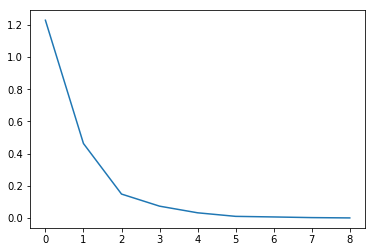

In [525]:
plt.plot(s)

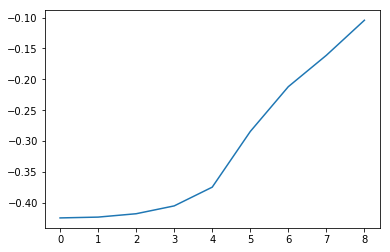

In [526]:
plt.plot(u.T[0])

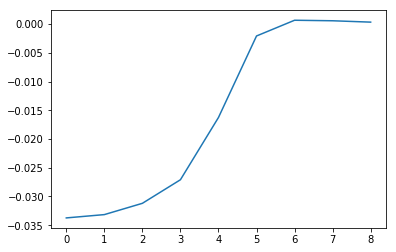

In [533]:
srt = np.argsort(v.T[0])
plt.plot(test_margins[:,srt[0]])

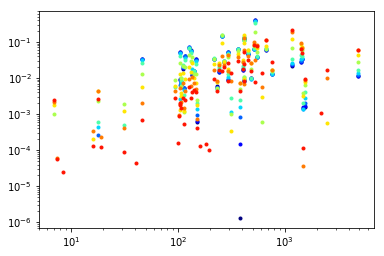

In [539]:
for n in range(Nsig):
    plt.loglog(np.abs(tc0.mean_gains), test_margins[n], '.', color = cm.jet(n/Nsig))

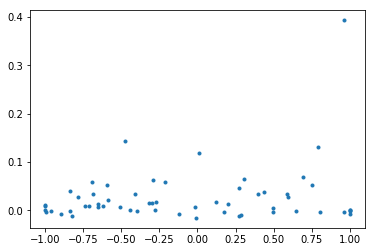

In [549]:
n = -1
plt.plot(tc0.mean_intercepts, test_margins[0], '.')

In [296]:
metric = np.array([np.cos(n*np.pi*iin) for n in np.linspace(0,10,20)]).reshape(20,100).T

In [297]:
tc0.update_metric(None)
tc1.update_metric(None)

In [298]:
tc0.gen_lmargins()
tc1.gen_lmargins()
# tc2.gen_lmargins(metric = metric)

100%|████████████████████████████████████████████████████████████████████████████████| 256/256 [07:37<00:00,  1.68s/it]


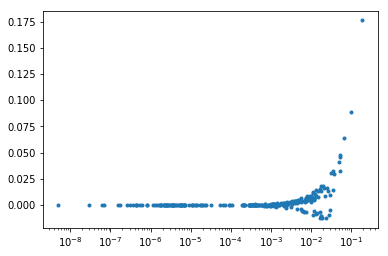

In [299]:
plt.plot(tc1.train_lmargins, tc1.test_lmargins, '.')
plt.xscale('log')

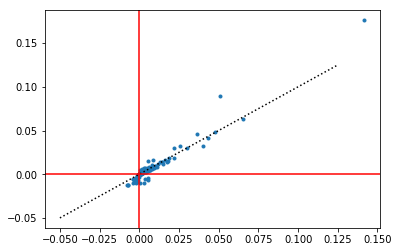

In [300]:
plt.plot(tc0.test_lmargins, tc1.test_lmargins, '.')
xx = np.linspace(-0.05, 0.125)
plt.plot(xx,xx, 'k:')
plt.axhline(0, color = 'r')
plt.axvline(0, color = 'r')

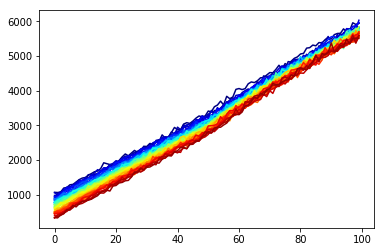

In [304]:
srt = np.argsort(tc0.test_lmargins)
index = 2
for r in range(R):
    plt.plot(A[:,srt[index], r], c = cm.jet(r/R))

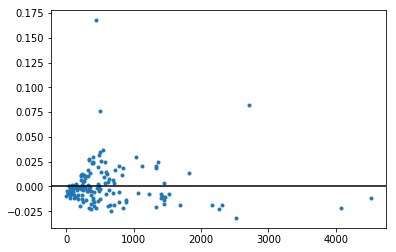

In [246]:
plt.plot(np.abs(tc0.mean_gains), tc0.test_lmargins, '.')
plt.axhline(0, color = 'k')

In [252]:
dgains = tc0.gains[:,0] / tc0.gains[:,-1]

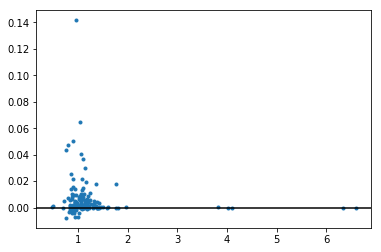

In [307]:
plt.plot(np.abs(dgains), tc0.test_lmargins, '.')
plt.axhline(0, color = 'k')
# plt.xscale('log')

In [255]:
dints = tc0.intercepts[:,0] - tc0.intercepts[:,-1]

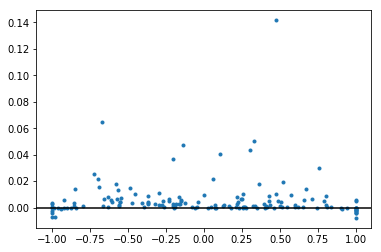

In [306]:
plt.plot(tc0.mean_intercepts, tc0.test_lmargins, '.')
plt.axhline(0, color = 'k')

(-1000, 1000)

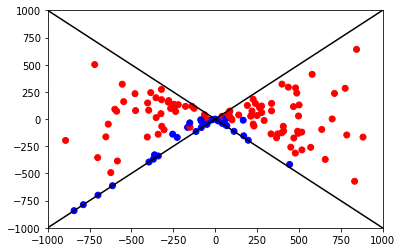

In [312]:
cscale = tc1.test_lmargins
fmax = 1000
xx = np.linspace(-fmax,fmax, 2)
# cscale = ((cscale)/np.std(cscale) + 1)/2
cscale = np.sign(cscale) + 1
plt.scatter((tc0.mean_gains), tc0.mean_gains*tc0.mean_intercepts, color = cm.bwr(cscale))
plt.plot(xx, xx, 'k')
plt.plot(xx, -xx, 'k')
plt.xlim([-fmax,fmax])
plt.ylim([-fmax, fmax])

0.1484375


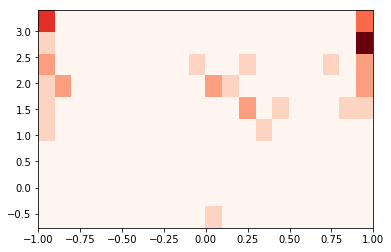

In [333]:
bad = (tc0.test_lmargins < 0) & (~np.isnan(tc1.mean_intercepts))
h = plt.hist2d(tc1.mean_intercepts[bad], np.log10(np.abs(tc1.mean_gains[bad])), cmap = 'Reds', bins = [20,10])
print(np.sum(bad)/A.shape[1])

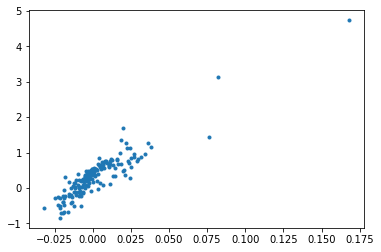

In [288]:
plt.plot(tc0.test_lmargins, cscale, '.')

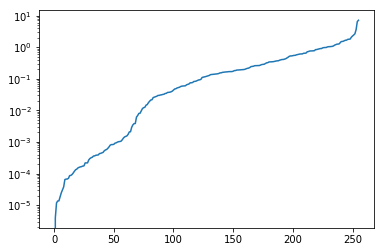

In [53]:
plt.plot(np.sort(tc0.train_lmargins - np.min(tc0.train_lmargins)))
plt.yscale('log')

(array([ 1.,  5., 11., 26., 22., 12., 34., 66., 64., 15.]),
 array([-6.        , -5.31470099, -4.62940197, -3.94410296, -3.25880395,
        -2.57350493, -1.88820592, -1.20290691, -0.5176079 ,  0.16769112,
         0.85299013]),
 <a list of 10 Patch objects>)

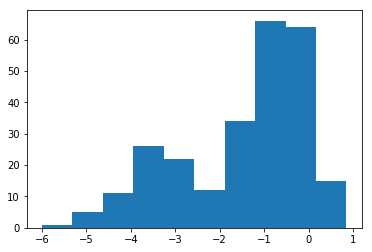

In [63]:
plt.hist(np.log10(tc0.train_lmargins - np.min(tc0.train_lmargins) + 1e-6))

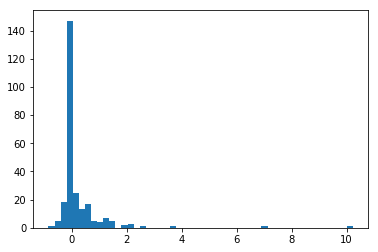

In [82]:
h = plt.hist(tc0.test_lmargins, bins = 50)

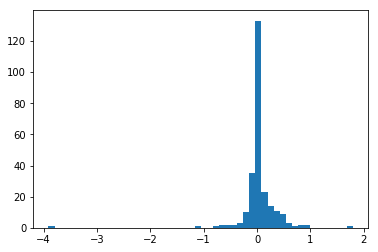

In [114]:
h = plt.hist((tc0.train_lmargins-tc0.test_lmargins), bins = 50)

In [109]:
srt = np.argsort(tc0.train_lmargins-tc0.test_lmargins)[::-1]

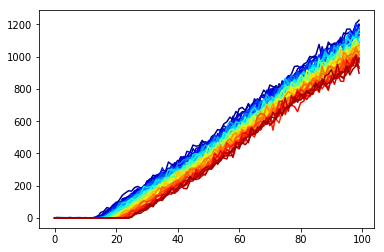

In [121]:
index = -7
Q,N,R = A.shape
for r in range(R):
    plt.plot(A[:,srt[index],r], c = cm.jet(r/R))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


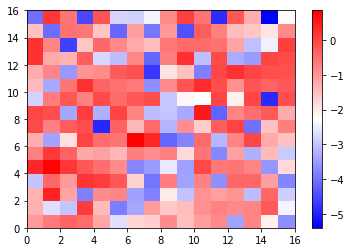

In [58]:
plt.pcolormesh(np.log10(tc0.train_lmargins - np.min(tc0.train_lmargins)).reshape(16,16), cmap = 'bwr')
plt.colorbar()

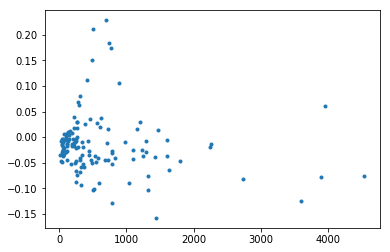

In [68]:
plt.plot(np.abs(tc.mean_gains), tc.test_lmargins, '.')

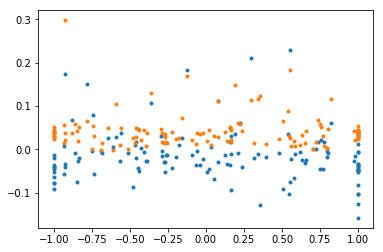

In [71]:
plt.plot(tc.mean_intercepts, tc.test_lmargins, '.')
plt.plot(tc.mean_intercepts, tc.train_lmargins, '.')

In [75]:
srt = np.argsort(tc.test_lmargins)[::-1]

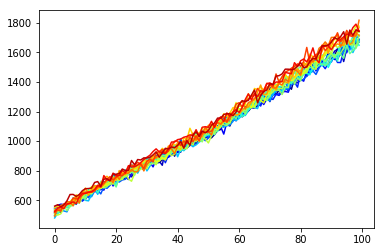

In [90]:
index = -9
for r in range(R):
    plt.plot(A[:,srt[index],r], c = cm.jet(r/R))

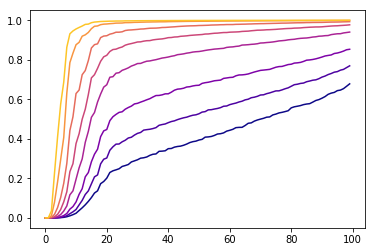

In [31]:
for n, sigma in enumerate([0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]):
    tc.update_sigma(sigma)
    plt.plot(tc.train_eigenerrors, color = cm.plasma(n/8))

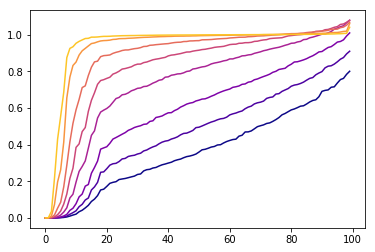

In [32]:
for n, sigma in enumerate([0.05, 0.1, 0.2, 0.5, 1, 2, 5, 10]):
    tc.update_sigma(sigma)
    plt.plot(tc.test_eigenerrors, color = cm.plasma(n/8))

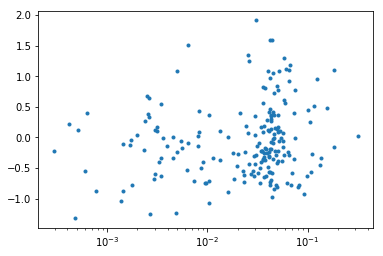

In [7]:
plt.plot(tc.train_lmargins, tc.test_lmargins, '.')
plt.xscale('log')

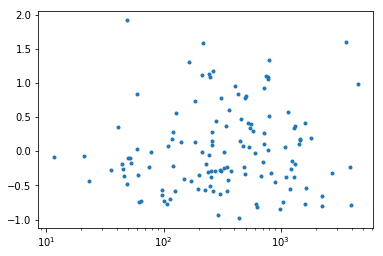

In [8]:
plt.plot(np.abs(tc.mean_gains), tc.test_lmargins, '.')
plt.xscale('log')

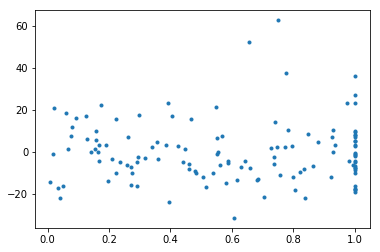

In [10]:
plt.plot(np.abs(tc.mean_intercepts), tc.test_lmargins/tc.train_lmargins, '.')

In [8]:
def lesion_histogram(lesions, bins = 20):
    y, x = np.histogram(np.log(lesions), bins = bins)
    N = len(lesions)
    y = y
    x = (x[1:] + x[:-1])/2.
    plt.fill_between(np.exp(x),y, step='pre', edgecolor = 'k')
    plt.xscale('log')
    plt.xlabel('Lesion Margin', fontsize = 14)
    plt.ylabel('Number of Neurons', fontsize = 14)
    plt.title('Lesion Margin Distribution for ' + str(N) + ' Neurons', fontsize = 14)

Text(0.5,1,'Lesion Margin Distribution, $\\sigma = 0.1$')

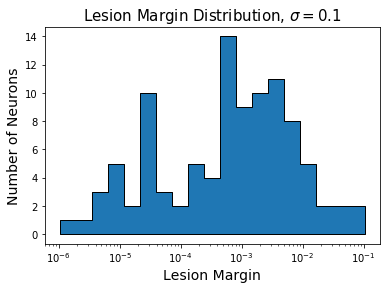

In [9]:
lesion_histogram(lesions[0])
plt.title('Lesion Margin Distribution, $\sigma = 0.1$', fontsize = 15)


Text(0.5,1,'Lesion Margin Distribution, $\\sigma = 0.5$')

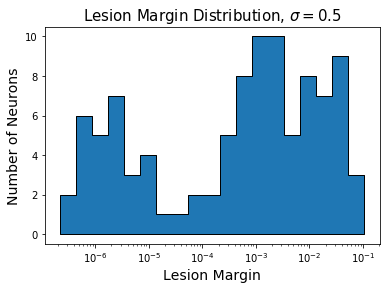

In [10]:
lesion_histogram(lesions[1])
plt.title('Lesion Margin Distribution, $\sigma = 0.5$', fontsize = 15)


Text(0.5,1,'Lesion Margin Distribution, $\\sigma = 1$')

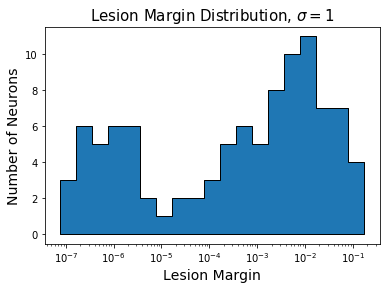

In [11]:
lesion_histogram(lesions[2])
plt.title('Lesion Margin Distribution, $\sigma = 1$', fontsize = 15)


145


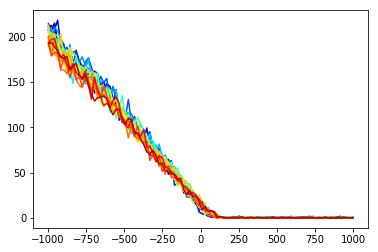

In [279]:
index = np.random.randint(N)
print(index)
for r in range(R):
    plt.plot(iin*997, A[:,index,r], c = cm.jet(r/R))

Text(0.5,1,'Lesion Margin Distribution, $\\sigma = 5$')

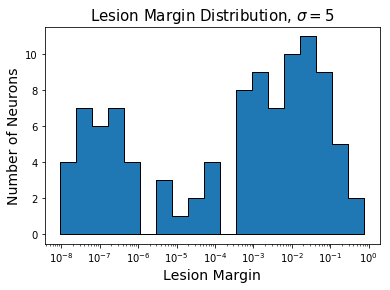

In [12]:
lesion_histogram(lesions[3])
plt.title('Lesion Margin Distribution, $\sigma = 5$', fontsize = 15)


Text(0.5,1,'Lesion Margin Distribution, $\\sigma = 10$')

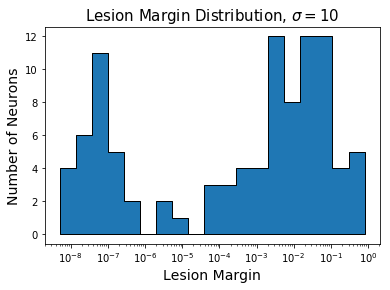

In [13]:
lesion_histogram(lesions[4])
plt.title('Lesion Margin Distribution, $\sigma = 10$', fontsize = 15)


In [14]:
metric = np.array([np.power(iin.reshape(Q), p) for p in range(10)]).T
metricized_lesions = tc.ugly_pop_lesion(metric = metric)

0


In [129]:
Acut1 = A[:,:200, :]
Acut2 = A[:,:400, :]
sigma = 5
tc1 = tuning_curves(Acut1, Tarr, sigma)
tc2 = tuning_curves(Acut2, Tarr, sigma)

In [130]:
lesions100 = tc1.ugly_pop_lesion(metric = metric)
lesions200 = tc2.ugly_pop_lesion(metric = metric)

0
100
0
100
200
300


In [131]:
l1 = lesions100
l2 = lesions200[:200]

0.5622349000923909


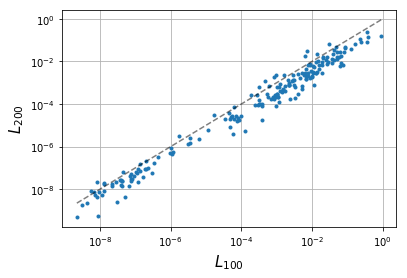

In [132]:
plt.loglog(l1, l2, '.')
x = [np.min(l1), np.max(l1)]
plt.loglog(x,x, 'k--', alpha = 0.5)
plt.grid(True)
plt.xlabel('$L_{100}$', fontsize = 15)
plt.ylabel('$L_{200}$', fontsize = 15)
print(np.mean(l2/l1))

In [133]:
def get_locations(i, A, iin):
    Q, N, R = A.shape
    assert(i < N)
    intercepts = np.ndarray((R))
    gains = np.ndarray((R))
    for r in range(R):
        intercepts[r], gains[r] = get_intercept_gain(A[:,i,r], iin)
    return intercepts, gains

def get_intercept_gain(curve, iin):
    assert(len(curve) == len(iin))
    thresh = 30

    left = curve[-1] < curve[0]
    firing = np.where(curve > thresh)[0]
    if (len(firing) == 0):
        return [None, None]
    if (left):
        threshold = iin[firing[-1]]
    else:
        threshold = iin[firing[0]]
    gain = (curve[firing][-1] - curve[firing][0])/(iin[firing][-1] - iin[firing][0])
    return threshold, gain

In [134]:
ints = np.ndarray((200))
biases = np.ndarray((200))
for n in range(200):
    i, b = get_locations(n, A, iin)
    ints[n] = np.nanmean(i)
    biases[n] = np.nanmean(b)

C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: Mean of empty slice
C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: Mean of empty slice
C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: invalid value encountered in true_divide


In [135]:
all_ints = np.ndarray((N))
all_biases = np.ndarray((N))
for n in range(N):
    i, b = get_locations(n, A, iin)
    all_ints[n] = np.nanmean(i)
    all_biases[n] = np.nanmean(b)

C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: Mean of empty slice
C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: Mean of empty slice
C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: invalid value encountered in true_divide


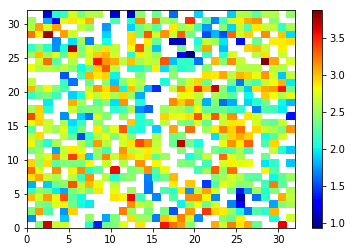

In [136]:
plt.pcolormesh(np.log10(np.abs(all_biases)).reshape(32,32), cmap = 'jet')
plt.colorbar()

In [137]:
new_ints = np.ndarray((200))
new_biases = np.ndarray((200))
for n in range(200):
    i, b = get_locations(n+200, A, iin)
    new_ints[n] = np.nanmean(i)
    new_biases[n] = np.nanmean(b)

C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: Mean of empty slice
C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: Mean of empty slice
C:\Users\Scott Reid\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: RuntimeWarning: invalid value encountered in true_divide


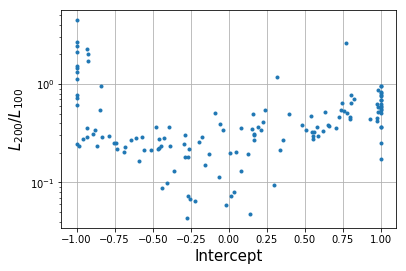

In [140]:
plt.plot(ints, l2/l1, '.')
plt.yscale('log')
plt.xlabel('Intercept', fontsize = 15)
plt.ylabel('$L_{200}/L_{100}$', fontsize = 15)
plt.grid()

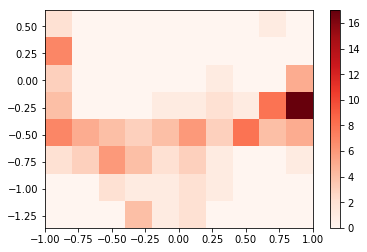

In [141]:
h =plt.hist2d(ints[~np.isnan(ints)], np.log10(l2/l1)[~np.isnan(ints)], bins = [10,8], cmap = 'Reds')
plt.colorbar()

In [142]:
counts = h[0]
counts = np.array([counts[i]/np.sum(counts[i]) for i in range(len(counts))])

In [143]:
maxb = []
for n in range(counts.shape[0]):
    maxb.append(h[2][np.argmax(counts[n])]+ (h[2][2]-h[2][1])/2) 

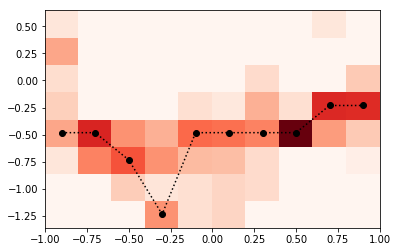

In [144]:
plt.pcolormesh(h[1], h[2], counts.T, cmap = 'Reds')
hx = 0.5*(h[1][1:] + h[1][:-1])
plt.plot(hx, maxb, 'ko:')

Text(0.5,1,'New Neuron Intercept Distribution')

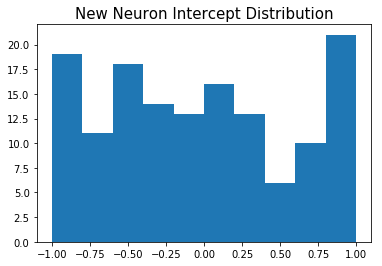

In [145]:
plt.hist(new_ints[~np.isnan(new_ints)])
plt.title('New Neuron Intercept Distribution', fontsize=15)

Text(0.5,1,'New Neuron Intercept Distribution, Weighted by Gain')

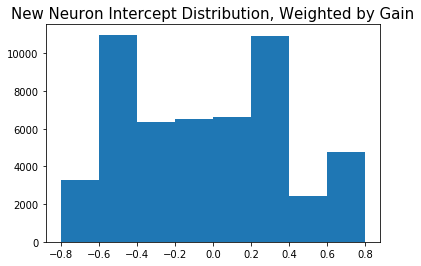

In [146]:
plt.hist(new_ints[~np.isnan(new_ints)], weights=np.abs(new_biases[~np.isnan(new_ints)]))
plt.title('New Neuron Intercept Distribution, Weighted by Gain', fontsize = 15)

In [136]:
l3 = lesions200[100:]

In [137]:
srt = np.argsort(l3)[::-1] + 100

Text(0.5,0.98,'4 New Neurons with Largest Lesion Margins')

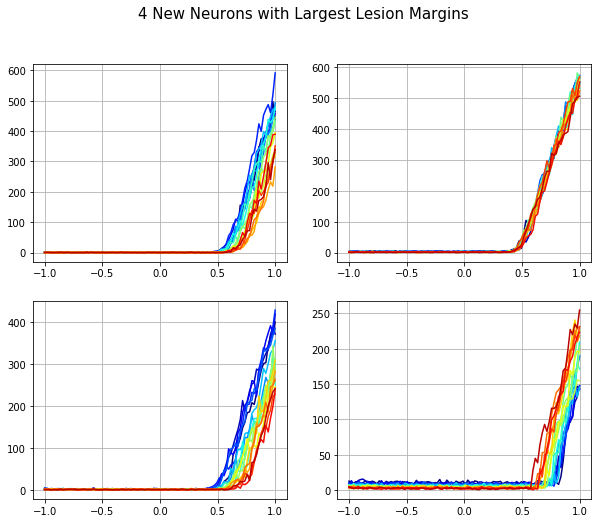

In [159]:
fig, ax = plt.subplots(2,2, figsize = (10,8))
ax = ax.flatten()
for index in range(4):
    for r in range(R):
        ax[index].plot(iin, A[:,srt[index], r], c = cm.jet(r/R))
        ax[index].grid()
plt.suptitle('4 New Neurons with Largest Lesion Margins', fontsize = 15)

In [1281]:
np.min(metricized_lesions)

-7.08709170707765e-10

(array([ 1.,  0.,  2.,  5.,  7., 13., 12., 19., 25., 29., 23., 25., 32.,
        25., 12., 12., 11., 16., 18., 12.,  9., 38., 40., 51., 60., 70.,
        65., 48., 64., 43., 49., 42., 44., 34., 30., 15.,  8.,  4.,  6.,
         1.]),
 array([-9.65469673, -9.44432977, -9.2339628 , -9.02359584, -8.81322888,
        -8.60286192, -8.39249496, -8.182128  , -7.97176104, -7.76139407,
        -7.55102711, -7.34066015, -7.13029319, -6.91992623, -6.70955927,
        -6.49919231, -6.28882534, -6.07845838, -5.86809142, -5.65772446,
        -5.4473575 , -5.23699054, -5.02662358, -4.81625661, -4.60588965,
        -4.39552269, -4.18515573, -3.97478877, -3.76442181, -3.55405485,
        -3.34368788, -3.13332092, -2.92295396, -2.712587  , -2.50222004,
        -2.29185308, -2.08148612, -1.87111915, -1.66075219, -1.45038523,
        -1.24001827]),
 <a list of 40 Patch objects>)

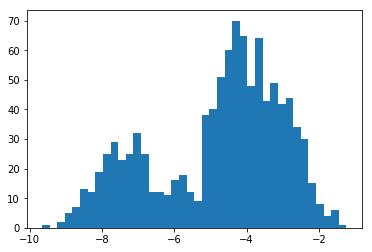

In [1283]:
plt.hist(np.log10(metricized_lesions[metricized_lesions > 0]), bins = 40)

In [1284]:
sort = np.argsort(metricized_lesions)[::-1]

In [1321]:
srt = np.argsort(lesions-metricized_lesions)[::-1]

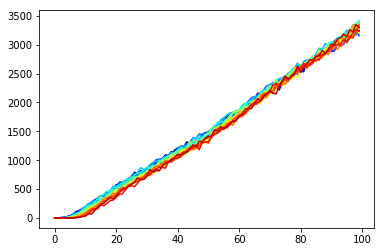

In [1330]:
index = -4
for r in range(R):
    plt.plot(A[:,srt[index], r], c = cm.jet(r/R))

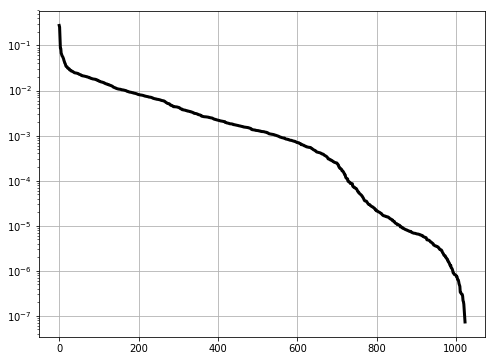

In [762]:
plt.figure(figsize = (8,6))
plt.plot(Q*(np.sort(lesions)[::-1]), 'k', lw = 3)
plt.yscale('log')
plt.grid()

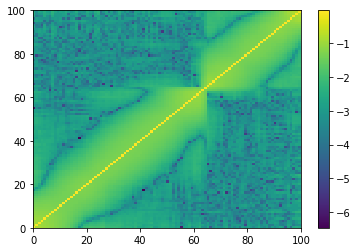

In [154]:
plt.pcolormesh(np.log10(np.abs(tc2.eop)))
plt.colorbar()

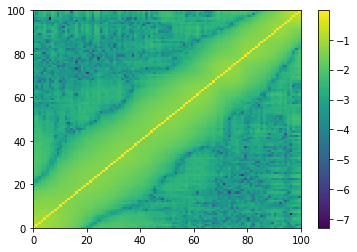

In [155]:
plt.pcolormesh(np.log10(np.abs(tc1.eop)))
plt.colorbar()

In [195]:
tc = tuning_curves(A, Tarr, 0.1)

In [197]:
tc.trace

0.6481184516141192

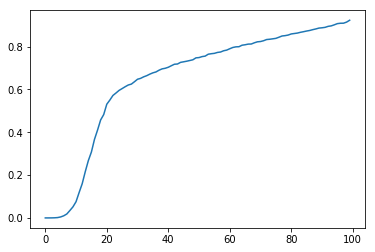

In [198]:
plt.plot(tc.eigenerrors)

Text(0.5,1,'Lesion Margin Distribution for 1024 Neurons')

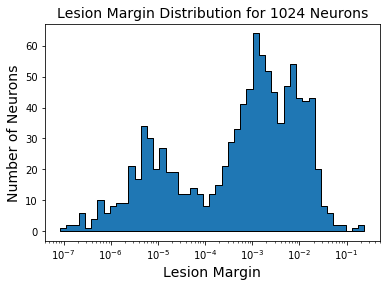

In [831]:
y, x = np.histogram(np.log(Q*lesions), bins = 50)
y = y
x = (x[1:] + x[:-1])/2.
plt.fill_between(np.exp(x),y, step='pre', edgecolor = 'k')
plt.xscale('log')
plt.xlabel('Lesion Margin', fontsize = 14)
plt.ylabel('Number of Neurons', fontsize = 14)
plt.title('Lesion Margin Distribution for 1024 Neurons', fontsize = 14)

In [839]:
lsort = np.argsort(lesions)[::-1]

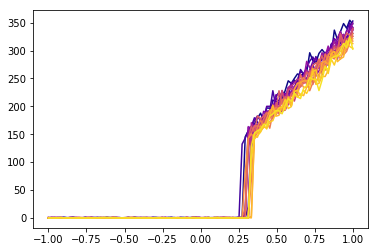

In [843]:
index = 12
for r in range(R):
    plt.plot(iin, A[:,lsort[index], r], c = cm.plasma(r/R))
    plt.title('T-Dep Tuning Curve for the ' + str(index) + ' ')

In [816]:
t0 = tuning_curves(A[:,:100,:], Tarr, 1)
t1 = tuning_curves(A[:,:300,:], Tarr, 1)
l0 = t0.ugly_pop_lesion()
l1 = t1.ugly_pop_lesion()

0
0
100
200


Text(0.5,1,'Lesion Margin Distribution for 1024 Neurons')

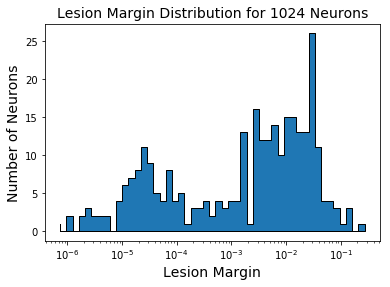

In [832]:
y, x = np.histogram(np.log(Q*l1), bins = 50)
y = y
x = (x[1:] + x[:-1])/2.
plt.fill_between(np.exp(x),y, step='pre', edgecolor = 'k')
plt.xscale('log')
plt.xlabel('Lesion Margin', fontsize = 14)
plt.ylabel('Number of Neurons', fontsize = 14)
plt.title('Lesion Margin Distribution for 1024 Neurons', fontsize = 14)

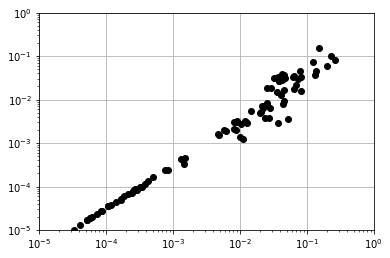

In [828]:
plt.plot(Q*l0, Q*l1[:100], 'ko')
plt.grid()
plt.xlim([1e-5, 1])
plt.ylim([1e-5, 1])
plt.xscale('log')
plt.yscale('log')

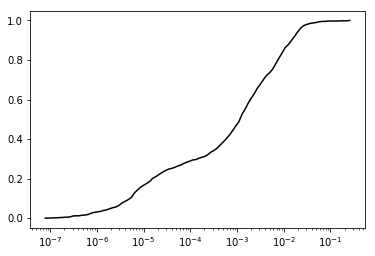

In [789]:
plt.plot(np.exp(x), np.cumsum(y), 'k')
plt.xscale('log')

Text(0.5,1,'Spatial Distribution of Lesion Margins')

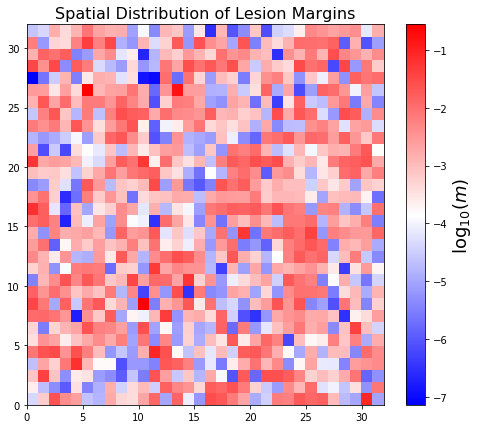

In [853]:
plt.figure(figsize = (8,7))
lresh = np.log10(Q*lesions.reshape((32,32)))
plt.pcolormesh(lresh, cmap = 'bwr')
cb = plt.colorbar()
cb.set_label('log$_{10}$($m$)', fontsize = 18)
plt.title('Spatial Distribution of Lesion Margins', fontsize = 16)

In [697]:
tcp = tuning_curves(A[:,:50, :], Tarr, 1)

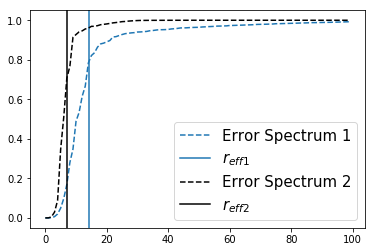

In [714]:
plt.plot(tc.eigenerrors, '--', label = 'Error Spectrum 1')
plt.axvline(Q*(1-tc.trace), label = '$r_{eff1}$')
plt.plot(tcp.eigenerrors, 'k--', label = 'Error Spectrum 2')
plt.axvline(Q*(1-tcp.trace), color = 'k', label = '$r_{eff2}$')
plt.legend(fontsize = 15)
# plt.yscale('log')

Text(0.5,1,'2D Histogram of Lesion Margin vs. Gain')

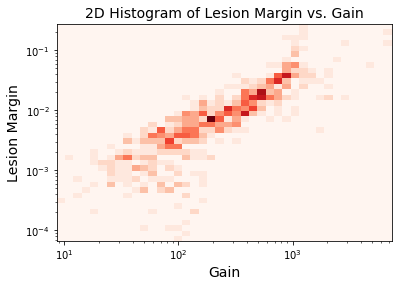

In [1159]:
plt.pcolormesh(np.power(10,h[1]), np.power(10,h[2]), h[0], cmap = 'Reds')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Gain', fontsize = 14)
plt.ylabel('Lesion Margin', fontsize = 14)
plt.title('2D Histogram of Lesion Margin vs. Gain', fontsize = 14)